# [Kaggle Dataset Link](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and Cleaning

In [2]:
data = pd.read_csv("/content/Airbnb_Open_Data.csv")
data

<ipython-input-2-d6a267813cc6>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Airbnb_Open_Data.csv")


id                                              NAME  \
0       1001254                Clean & quiet apt home by the park   
1       1002102                             Skylit Midtown Castle   
2       1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3       1002755                                               NaN   
4       1003689  Entire Apt: Spacious Studio/Loft by central park   
...         ...                                               ...   
102594  6092437                        Spare room in Williamsburg   
102595  6092990                     Best Location near Columbia U   
102596  6093542                    Comfy, bright room in Brooklyn   
102597  6094094                  Big Studio-One Stop from Midtown   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline            Brooklyn   
1       52335172823               verified        Jenna           Manhattan   
2       78829239556                    NaN        Elise           Manhattan   
3       85098326012            unconfirmed        Garry            Brooklyn   
4       92037596077               verified       Lyndon           Manhattan   
...             ...                    ...          ...                 ...   
102594  12312296767               verified         Krik            Brooklyn   
102595  77864383453            unconfirmed        Mifan           Manhattan   
102596  69050334417            unconfirmed        Megan            Brooklyn   
102597  11160591270            unconfirmed  Christopher              Queens   
102598  68170633372            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long        country  ...  \
0                Kensington  40.64749 -73.97237  United States  ...   
1                   Midtown  40.75362 -73.98377  United States  ...   
2                    Harlem  40.80902 -73.94190  United States  ...   
3              Clinton Hill  40.68514 -73.95976  United States  ...   
4               East Harlem  40.79851 -73.94399  United States  ...   
...                     ...       ...       ...            ...  ...   
102594         Williamsburg  40.70862 -73.94651  United States  ...   
102595  Morningside Heights  40.80460 -73.96545  United States  ...   
102596           Park Slope  40.67505 -73.98045  United States  ...   
102597     Long Island City  40.74989 -73.93777  United States  ...   
102598      Upper West Side  40.76807 -73.98342  United States  ...   

       service fee minimum nights number of reviews last review  \
0            $193            10.0               9.0  10/19/2021   
1             $28            30.0              45.0   5/21/2022   
2            $124             3.0               0.0         NaN   
3             $74            30.0             270.0    7/5/2019   
4             $41            10.0               9.0  11/19/2018   
...            ...            ...               ...         ...   
102594       $169             1.0               0.0         NaN   
102595       $167             1.0               1.0    7/6/2015   
102596       $198             3.0               0.0         NaN   
102597       $109             2.0               5.0  10/11/2015   
102598       $206             1.0               0.0         NaN   

        reviews per month review rate number calculated host listings count  \
0                    0.21                4.0                            6.0   
1                    0.38                4.0                            2.0   
2                     NaN                5.0                            1.0   
3                    4.64                4.0                            1.0   
4                    0.10                3.0                            1.0   
...                   ...                ...                            ...   
102594                Na

In [3]:
data.shape

(102599, 26)

In [4]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
data.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [6]:
data.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

As we cn see 'license' column has almost all missing values so just drop it.

In [7]:
data.drop(['license'], axis = 1)

id                                              NAME  \
0       1001254                Clean & quiet apt home by the park   
1       1002102                             Skylit Midtown Castle   
2       1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3       1002755                                               NaN   
4       1003689  Entire Apt: Spacious Studio/Loft by central park   
...         ...                                               ...   
102594  6092437                        Spare room in Williamsburg   
102595  6092990                     Best Location near Columbia U   
102596  6093542                    Comfy, bright room in Brooklyn   
102597  6094094                  Big Studio-One Stop from Midtown   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline            Brooklyn   
1       52335172823               verified        Jenna           Manhattan   
2       78829239556                    NaN        Elise           Manhattan   
3       85098326012            unconfirmed        Garry            Brooklyn   
4       92037596077               verified       Lyndon           Manhattan   
...             ...                    ...          ...                 ...   
102594  12312296767               verified         Krik            Brooklyn   
102595  77864383453            unconfirmed        Mifan           Manhattan   
102596  69050334417            unconfirmed        Megan            Brooklyn   
102597  11160591270            unconfirmed  Christopher              Queens   
102598  68170633372            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long        country  ...    price  \
0                Kensington  40.64749 -73.97237  United States  ...    $966    
1                   Midtown  40.75362 -73.98377  United States  ...    $142    
2                    Harlem  40.80902 -73.94190  United States  ...    $620    
3              Clinton Hill  40.68514 -73.95976  United States  ...    $368    
4               East Harlem  40.79851 -73.94399  United States  ...    $204    
...                     ...       ...       ...            ...  ...      ...   
102594         Williamsburg  40.70862 -73.94651  United States  ...    $844    
102595  Morningside Heights  40.80460 -73.96545  United States  ...    $837    
102596           Park Slope  40.67505 -73.98045  United States  ...    $988    
102597     Long Island City  40.74989 -73.93777  United States  ...    $546    
102598      Upper West Side  40.76807 -73.98342  United States  ...  $1,032    

       service fee minimum nights number of reviews  last review  \
0            $193            10.0               9.0   10/19/2021   
1             $28            30.0              45.0    5/21/2022   
2            $124             3.0               0.0          NaN   
3             $74            30.0             270.0     7/5/2019   
4             $41            10.0               9.0   11/19/2018   
...            ...            ...               ...          ...   
102594       $169             1.0               0.0          NaN   
102595       $167             1.0               1.0     7/6/2015   
102596       $198             3.0               0.0          NaN   
102597       $109             2.0               5.0   10/11/2015   
102598       $206             1.0               0.0          NaN   

       reviews per month review rate number  calculated host listings count  \
0                   0.21                4.0                             6.0   
1                   0.38                4.0                             2.0   
2                    NaN                5.0                             1.0   
3                   4.64                4.0                             1.0   
4                   0.10                3.0                   

In [8]:
data.describe()

id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000   
50%          2012.000000        3.000000           7.000000   
75%          2017.000000        5.000000          30.000000   
max          2022.000000     5645.000000        1024.000000   

       reviews per month  review rate number  calculated host listings count  \
count       86720.000000       102273.000000                   102280.000000   
mean            1.374022            3.279106                        7.936605   
std             1.746621            1.284657                       32.218780   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.000000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   

       availability 365  
count     102151.000000  
mean         141.133254  
std          135.435024  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          269.000000  
max         3677.000000

<ipython-input-9-24a2801b1fac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


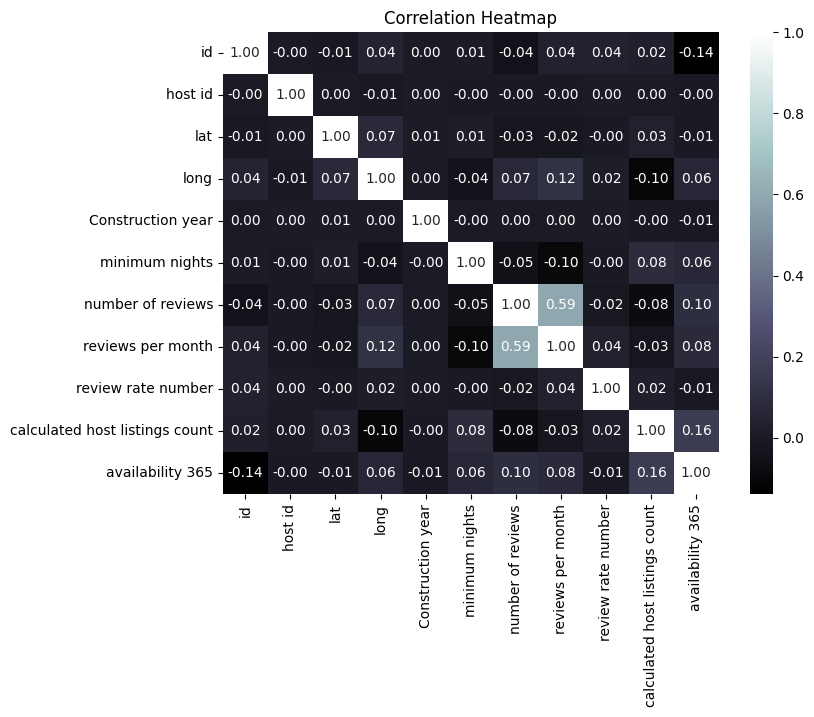

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='bone', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [10]:
data.shape

(102599, 26)

Finding what amount of data is missing in each column

In [11]:
missing_percentage = (data.isnull().mean() * 100).round(2)

# Display the result
print(missing_percentage)

id                                  0.00
NAME                                0.24
host id                             0.00
host_identity_verified              0.28
host name                           0.40
neighbourhood group                 0.03
neighbourhood                       0.02
lat                                 0.01
long                                0.01
country                             0.52
country code                        0.13
instant_bookable                    0.10
cancellation_policy                 0.07
room type                           0.00
Construction year                   0.21
price                               0.24
service fee                         0.27
minimum nights                      0.40
number of reviews                   0.18
last review                        15.49
reviews per month                  15.48
review rate number                  0.32
calculated host listings count      0.31
availability 365                    0.44
house_rules     

In [12]:
# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().mean()
# Drop columns with missing values greater than 50%
df_cleaned = data.drop(columns=missing_percentage[missing_percentage > 0.5].index)
print(df_cleaned)

             id                                              NAME  \
0       1001254                Clean & quiet apt home by the park   
1       1002102                             Skylit Midtown Castle   
2       1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3       1002755                                               NaN   
4       1003689  Entire Apt: Spacious Studio/Loft by central park   
...         ...                                               ...   
102594  6092437                        Spare room in Williamsburg   
102595  6092990                     Best Location near Columbia U   
102596  6093542                    Comfy, bright room in Brooklyn   
102597  6094094                  Big Studio-One Stop from Midtown   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline            Brooklyn   
1       52335

We already dropped 'license' column now the other column dropped is 'house_rules'

In [13]:
df_cleaned.shape

(102599, 24)

In [14]:
df_cleaned.isna().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

We have already dropped majority of missing rows but we also dont need any of these missing values. As they don't provide good information.

In [15]:
df_cleaned = df_cleaned.dropna(subset=['country code','country','neighbourhood group','neighbourhood','cancellation_policy','instant_bookable', 'host name','Construction year','lat','long','NAME','host_identity_verified'])


In [16]:
df_cleaned.isnull().sum()

id                                    0
NAME                                  0
host id                               0
host_identity_verified                0
host name                             0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                               225
service fee                         258
minimum nights                      383
number of reviews                   181
last review                       15661
reviews per month                 15655
review rate number                  286
calculated host listings count      310
availability 365                    389
dtype: int64

Removed unwanted characters from 'price' and 'service fee'

In [17]:
columns_to_process = ['price', 'service fee']

# Remove dollar signs and unwanted characters from specified columns
for column in columns_to_process:
    df_cleaned[column] = df_cleaned[column].replace('[\$,]', '', regex=True).astype(float)

print("\nDataFrame after removing unwanted characters:")
df_cleaned


DataFrame after removing unwanted characters:


id                                              NAME  \
0       1001254                Clean & quiet apt home by the park   
1       1002102                             Skylit Midtown Castle   
4       1003689  Entire Apt: Spacious Studio/Loft by central park   
5       1004098         Large Cozy 1 BR Apartment In Midtown East   
7       1005202                                   BlissArtsSpace!   
...         ...                                               ...   
102594  6092437                        Spare room in Williamsburg   
102595  6092990                     Best Location near Columbia U   
102596  6093542                    Comfy, bright room in Brooklyn   
102597  6094094                  Big Studio-One Stop from Midtown   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline            Brooklyn   
1       52335172823               verified        Jenna           Manhattan   
4       92037596077               verified       Lyndon           Manhattan   
5       45498551794               verified     Michelle           Manhattan   
7       90821839709            unconfirmed         Emma            Brooklyn   
...             ...                    ...          ...                 ...   
102594  12312296767               verified         Krik            Brooklyn   
102595  77864383453            unconfirmed        Mifan           Manhattan   
102596  69050334417            unconfirmed        Megan            Brooklyn   
102597  11160591270            unconfirmed  Christopher              Queens   
102598  68170633372            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long        country  ...  \
0                Kensington  40.64749 -73.97237  United States  ...   
1                   Midtown  40.75362 -73.98377  United States  ...   
4               East Harlem  40.79851 -73.94399  United States  ...   
5               Murray Hill  40.74767 -73.97500  United States  ...   
7        Bedford-Stuyvesant  40.68688 -73.95596  United States  ...   
...                     ...       ...       ...            ...  ...   
102594         Williamsburg  40.70862 -73.94651  United States  ...   
102595  Morningside Heights  40.80460 -73.96545  United States  ...   
102596           Park Slope  40.67505 -73.98045  United States  ...   
102597     Long Island City  40.74989 -73.93777  United States  ...   
102598      Upper West Side  40.76807 -73.98342  United States  ...   

       Construction year   price service fee minimum nights  \
0                 2020.0   966.0       193.0           10.0   
1                 2007.0   142.0        28.0           30.0   
4                 2009.0   204.0        41.0           10.0   
5                 2013.0   577.0       115.0            3.0   
7                 2009.0  1060.0       212.0           45.0   
...                  ...     ...         ...            ...   
102594            2003.0   844.0       169.0            1.0   
102595            2016.0   837.0       167.0            1.0   
102596            2009.0   988.0       198.0            3.0   
102597            2015.0   546.0       109.0            2.0   
102598            2010.0  1032.0       206.0            1.0   

        number of reviews  last review  reviews per month  review rate number  \
0                     9.0   10/19/2021               0.21                 4.0   
1                    45.0    5/21/2022               0.38                 4.0   
4                     9.0   11/19/2018               0.10                 3.0   
5                    74.0    6/22/2019               0.59                 3.0   
7                    49.0    10/5/2017               0.40                 5.0   
...                   ...          ...                ...                 ...   
102594                0.0          NaN                NaN 

Converted all numeric features to float for further modeling except 'host id'

In [18]:
exclude_column = 'host id'

# Convert all numeric columns to float, excluding the specified column
numeric_columns = df_cleaned.select_dtypes(include='number').columns.difference([exclude_column])
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].astype(float)

print("\nDataFrame after converting numeric columns to float:")
df_cleaned


DataFrame after converting numeric columns to float:


id                                              NAME  \
0       1001254.0                Clean & quiet apt home by the park   
1       1002102.0                             Skylit Midtown Castle   
4       1003689.0  Entire Apt: Spacious Studio/Loft by central park   
5       1004098.0         Large Cozy 1 BR Apartment In Midtown East   
7       1005202.0                                   BlissArtsSpace!   
...           ...                                               ...   
102594  6092437.0                        Spare room in Williamsburg   
102595  6092990.0                     Best Location near Columbia U   
102596  6093542.0                    Comfy, bright room in Brooklyn   
102597  6094094.0                  Big Studio-One Stop from Midtown   
102598  6094647.0                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline            Brooklyn   
1       52335172823               verified        Jenna           Manhattan   
4       92037596077               verified       Lyndon           Manhattan   
5       45498551794               verified     Michelle           Manhattan   
7       90821839709            unconfirmed         Emma            Brooklyn   
...             ...                    ...          ...                 ...   
102594  12312296767               verified         Krik            Brooklyn   
102595  77864383453            unconfirmed        Mifan           Manhattan   
102596  69050334417            unconfirmed        Megan            Brooklyn   
102597  11160591270            unconfirmed  Christopher              Queens   
102598  68170633372            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long        country  ...  \
0                Kensington  40.64749 -73.97237  United States  ...   
1                   Midtown  40.75362 -73.98377  United States  ...   
4               East Harlem  40.79851 -73.94399  United States  ...   
5               Murray Hill  40.74767 -73.97500  United States  ...   
7        Bedford-Stuyvesant  40.68688 -73.95596  United States  ...   
...                     ...       ...       ...            ...  ...   
102594         Williamsburg  40.70862 -73.94651  United States  ...   
102595  Morningside Heights  40.80460 -73.96545  United States  ...   
102596           Park Slope  40.67505 -73.98045  United States  ...   
102597     Long Island City  40.74989 -73.93777  United States  ...   
102598      Upper West Side  40.76807 -73.98342  United States  ...   

       Construction year   price service fee minimum nights  \
0                 2020.0   966.0       193.0           10.0   
1                 2007.0   142.0        28.0           30.0   
4                 2009.0   204.0        41.0           10.0   
5                 2013.0   577.0       115.0            3.0   
7                 2009.0  1060.0       212.0           45.0   
...                  ...     ...         ...            ...   
102594            2003.0   844.0       169.0            1.0   
102595            2016.0   837.0       167.0            1.0   
102596            2009.0   988.0       198.0            3.0   
102597            2015.0   546.0       109.0            2.0   
102598            2010.0  1032.0       206.0            1.0   

        number of reviews  last review  reviews per month  review rate number  \
0                     9.0   10/19/2021               0.21                 4.0   
1                    45.0    5/21/2022               0.38                 4.0   
4                     9.0   11/19/2018               0.10                 3.0   
5                    74.0    6/22/2019               0.59                 3.0   
7                    49.0    10/5/2017               0.40                 5.0   
...                   ...          ...                ...                 ...   
102594                0.0          N

Replaced missing values in price column with mean and for minimum nights,  service fee with zero

In [19]:
mean_price = df_cleaned['price'].mean()
df_cleaned['price'].fillna(mean_price, inplace=True)
df_cleaned['service fee'].fillna(0, inplace=True)
df_cleaned['minimum nights'].fillna(0, inplace=True)
print(df_cleaned['service fee'].head(20))
df_cleaned['price'].head(216)

0     193.0
1      28.0
4      41.0
5     115.0
7     212.0
8     204.0
9      58.0
10     64.0
11    121.0
13    116.0
14     30.0
15      0.0
35     38.0
36    222.0
37     41.0
38    219.0
39    204.0
41    113.0
42     74.0
44    171.0
Name: service fee, dtype: float64


0       966.0
1       142.0
4       204.0
5       577.0
7      1060.0
        ...  
381     971.0
382     696.0
383    1188.0
393     586.0
394     608.0
Name: price, Length: 216, dtype: float64

In [20]:
df_cleaned.isnull().sum().sort_values()

id                                    0
minimum nights                        0
service fee                           0
price                                 0
Construction year                     0
room type                             0
cancellation_policy                   0
country code                          0
country                               0
instant_bookable                      0
lat                                   0
neighbourhood                         0
neighbourhood group                   0
host name                             0
host_identity_verified                0
host id                               0
NAME                                  0
long                                  0
number of reviews                   181
review rate number                  286
calculated host listings count      310
availability 365                    389
reviews per month                 15655
last review                       15661
dtype: int64

In [21]:
df_cleaned["last review"] = pd.to_datetime(df_cleaned["last review"])

In [22]:
df_cleaned['neighbourhood group'] = df_cleaned['neighbourhood group'].replace('brookln', 'Brooklyn')

# Data Visualization

Creating a word cloud of the most frequent adjectives extracted from descriptions in the 'NAME' column

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Top adjectives and their counts (in descending order):
private: 15338
spacious: 7475
apt: 6224
east: 4992
beautiful: 4384
large: 4012
sunny: 3785
modern: 3748
central: 3569
new: 3346


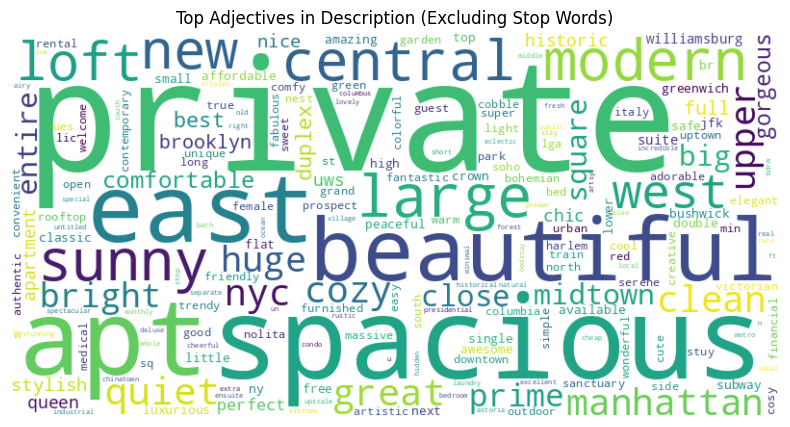

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords, punkt, and averaged_perceptron_tagger resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Combine all descriptions into a single string
all_descriptions = ' '.join(df_cleaned['NAME'].astype(str))

# Remove punctuation and convert to lowercase
all_descriptions = all_descriptions.lower()
all_descriptions = ''.join([char for char in all_descriptions if char.isalnum() or char.isspace()])

# Remove stopwords
stop_words = set(stopwords.words('english'))
all_descriptions = ' '.join([word for word in all_descriptions.split() if word not in stop_words])

# Tokenize words
words = word_tokenize(all_descriptions)

# Perform part-of-speech tagging
pos_tags = pos_tag(words)

# Filter adjectives
adjectives = [word for word, tag in pos_tags if tag.startswith('JJ') and tag != 'NNP']

# Create a frequency distribution for adjectives
freq_dist_adjectives = FreqDist(adjectives)

# Get the top adjectives and their counts in descending order
top_adjectives = freq_dist_adjectives.most_common(10)

# Display the top adjectives and their counts
print("Top adjectives and their counts (in descending order):")
for adjective, frequency in top_adjectives:
    print(f"{adjective}: {frequency}")

# Create a word cloud for adjectives
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_adjectives)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Adjectives in Description (Excluding Stop Words)')
plt.show()


Plotting a bar graph illustrating the number of listings per host

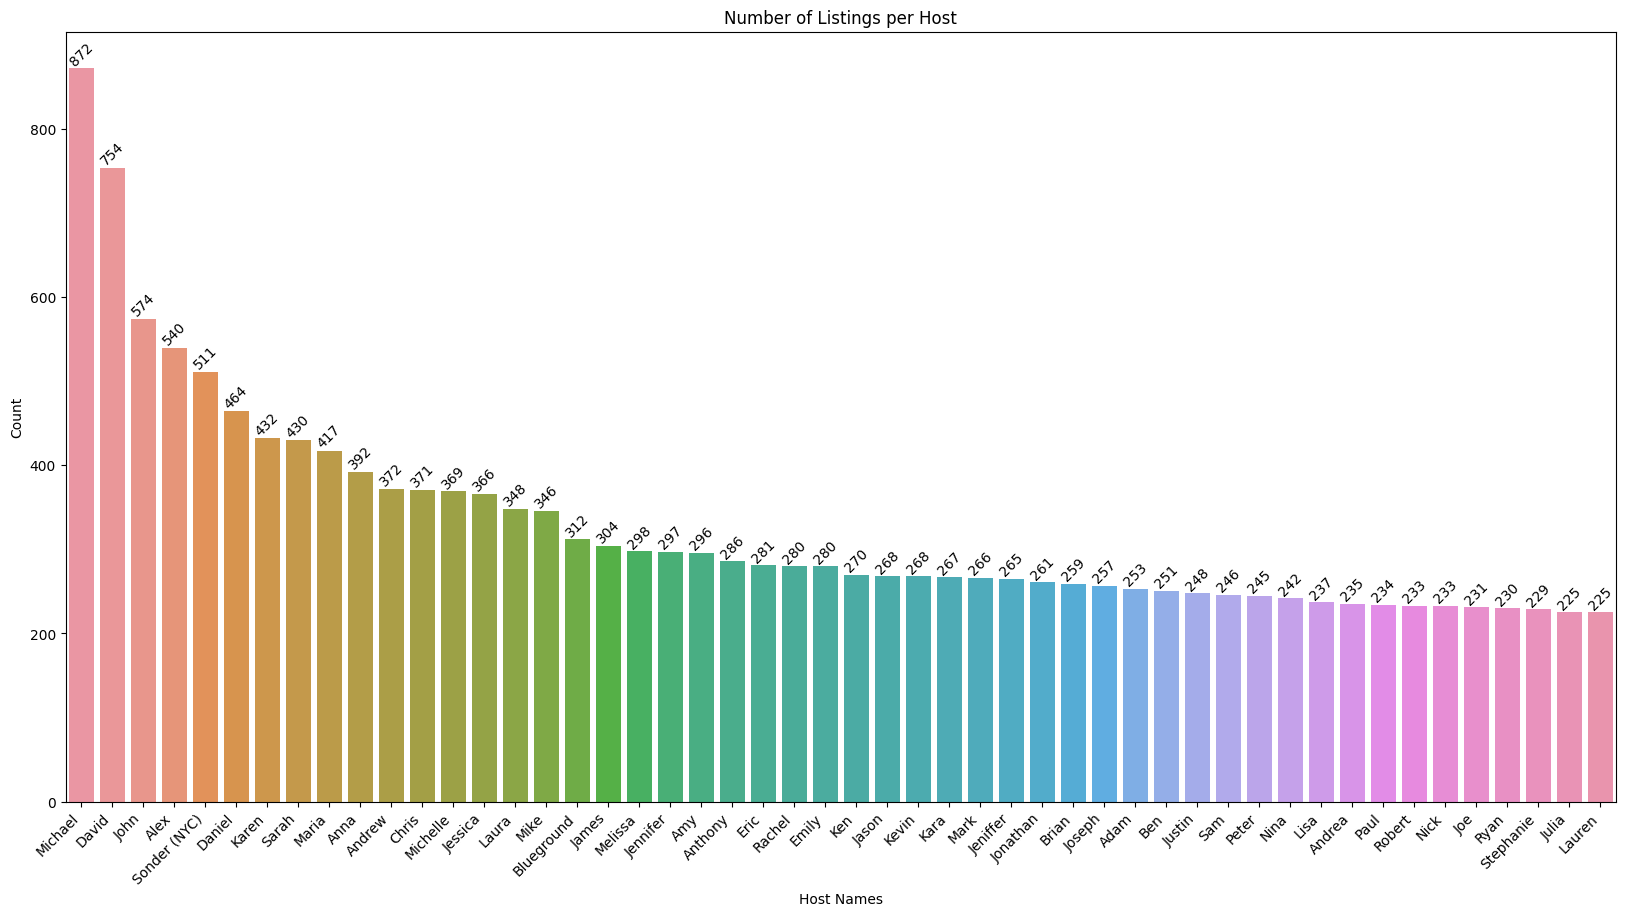

In [ ]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")
# Get the counts of each unique host name
host_counts = df_cleaned['host name'].value_counts().head(50)
# Plot a bar graph
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=host_counts.index, y=host_counts.values)
plt.xlabel('Host Names')
plt.ylabel('Count')
plt.title('Number of Listings per Host')
for i, count in enumerate(host_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', rotation=45)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df_cleaned['room type'].value_counts()

Entire home/apt    52828
Private room       45758
Shared room         2190
Hotel room           113
Name: room type, dtype: int64

Horizontal bar chart displaying the top 25 reviewed neighborhoods

neighbourhood
Bedford-Stuyvesant           267867.0
Williamsburg                 185624.0
Harlem                       174541.0
Bushwick                     121684.0
Hell's Kitchen               108886.0
East Village                  95484.0
Crown Heights                 87883.0
East Harlem                   80904.0
Upper West Side               75901.0
Upper East Side               68726.0
Chelsea                       57412.0
Midtown                       55281.0
Lower East Side               52183.0
Astoria                       49484.0
Greenpoint                    42894.0
East Elmhurst                 42715.0
Flushing                      40738.0
Washington Heights            38454.0
East Flatbush                 34827.0
Prospect-Lefferts Gardens     34748.0
Park Slope                    32540.0
Clinton Hill                  32354.0
West Village                  32261.0
Jamaica                       32164.0
Flatbush                      31707.0
Name: number of reviews, dtype: floa

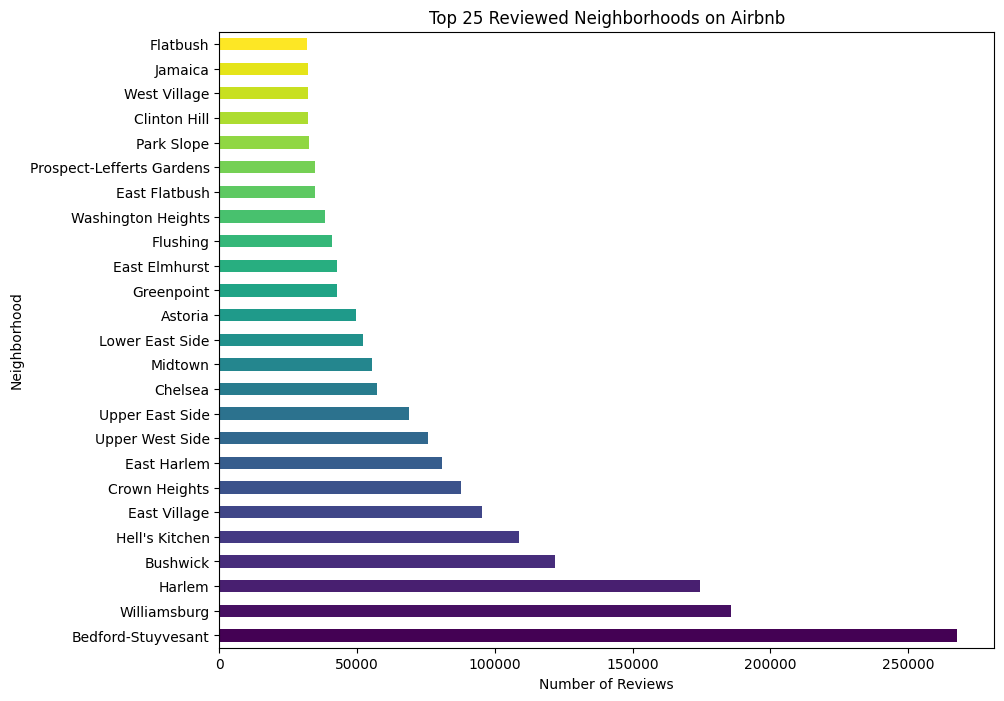

In [ ]:
import matplotlib.pyplot as plt
top_25_reviewed_neighbourhoods = df_cleaned.groupby('neighbourhood')['number of reviews'].sum().nlargest(25)
print(top_25_reviewed_neighbourhoods)
colors = plt.cm.viridis(np.linspace(0, 1, 25))
top_25_reviewed_neighbourhoods.plot(kind='barh', figsize=(10, 8), color=colors)
plt.title('Top 25 Reviewed Neighborhoods on Airbnb')
plt.xlabel('Number of Reviews')
plt.ylabel('Neighborhood')
plt.show()

Word cloud representation of the most frequent words in the 'neighbourhood' column

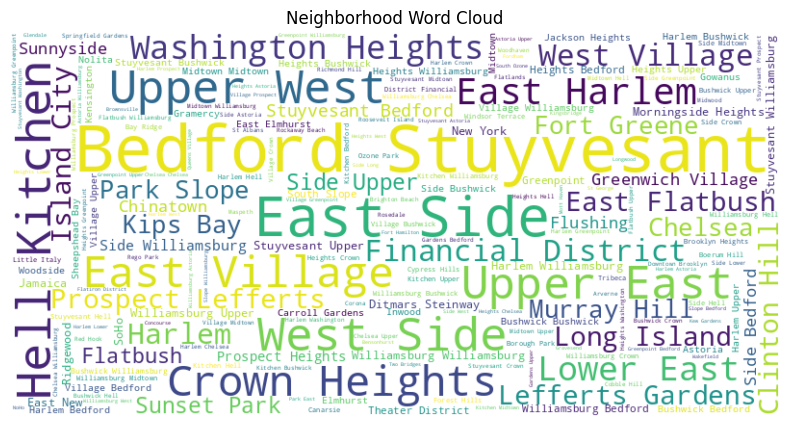

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df_cleaned['neighbourhood'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Neighborhood Word Cloud')
plt.show()

Count plot illustrating the distribution of room types within the top 25 neighborhoods

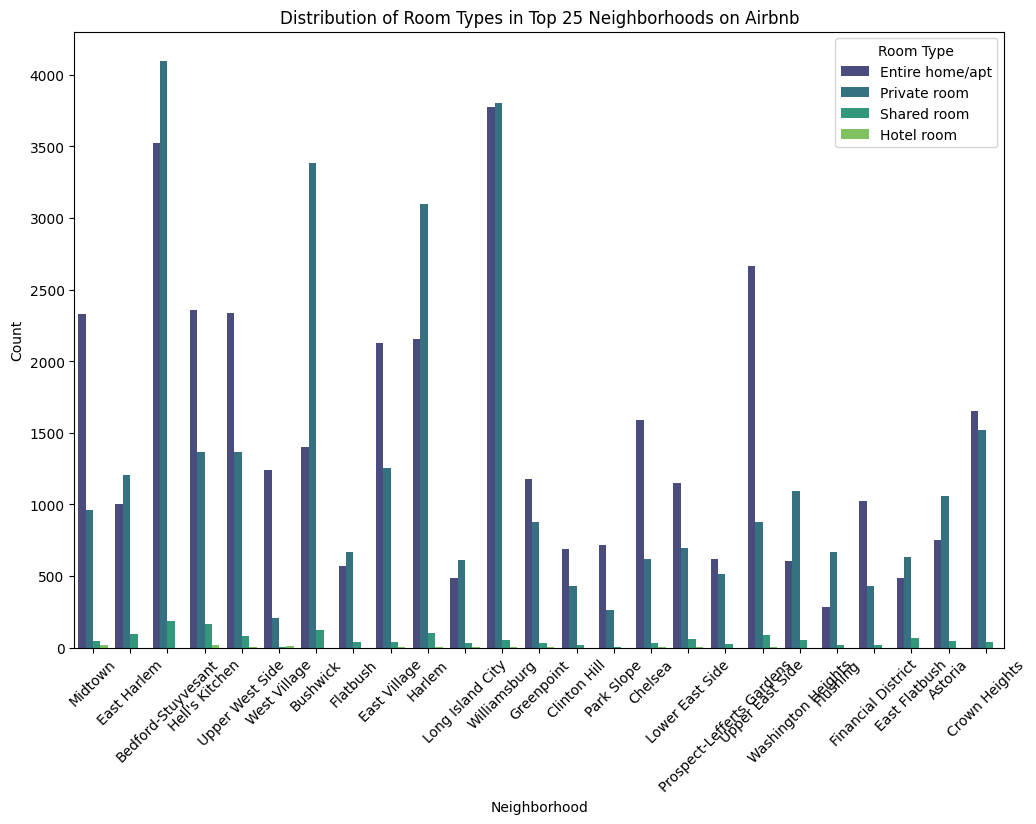

In [ ]:
plt.figure(figsize=(12, 8))
top_25_neighbourhoods = df_cleaned['neighbourhood'].value_counts().head(25).index
subset_df = df_cleaned[df_cleaned['neighbourhood'].isin(top_25_neighbourhoods)]

sns.countplot(x='neighbourhood', hue='room type', data=subset_df, palette='viridis')
plt.title('Distribution of Room Types in Top 25 Neighborhoods on Airbnb')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.legend(title='Room Type', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Plotting an interactive scatter map displaying the co-ordinates within the neighbourhood

In [ ]:
import pandas as pd
import plotly.express as px


# Calculate mean coordinates for each neighborhood group
mean_coordinates = df_cleaned.groupby('neighbourhood group').agg({'lat': 'mean', 'long': 'mean'}).reset_index()

# Create an interactive map using plotly.express
fig = px.scatter_mapbox(
    mean_coordinates,
    lat='lat',
    lon='long',
    text='neighbourhood group',
    zoom=9,
    size_max = 50,
    size='lat'
)

# Set the mapbox style
fig.update_layout(mapbox_style="carto-positron")

# Show the map
fig.show()


Plotting a donut chart to visualize the percentage distribution of properties in different neighborhood groups

In [ ]:
import pandas as pd
import plotly.express as px


# Calculate the percentage distribution
percentage_distribution = df_cleaned['neighbourhood group'].value_counts(normalize=True) * 100

# Create a DataFrame with the calculated percentages
percentage_df = pd.DataFrame({'Category': percentage_distribution.index, 'Percentage': percentage_distribution.values})

# Create a donut chart using plotly
fig = px.pie(
    percentage_df,
    names='Category',
    values='Percentage',
    hole=0.6,  # Set hole size for a donut chart
    title='Precentage of properties in Neighborhoods',
    labels={'Percentage': '%'}
)

# Show the chart
fig.show()


Visualizing the average availability of properties across different neighborhood groups

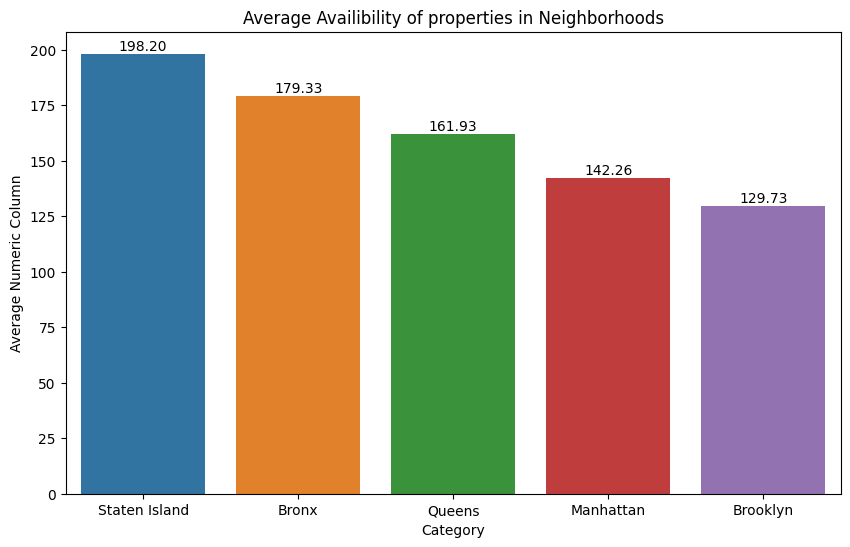

In [ ]:
avg_data = df_cleaned.groupby('neighbourhood group')['availability 365'].mean().reset_index()
avg_data = avg_data.sort_values(by='availability 365', ascending=False)

# Plot the average against the categorical column using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='neighbourhood group', y='availability 365', data=avg_data)

# Add average labels outside the bars
for index, value in enumerate(avg_data['availability 365']):
    plt.text(index, value + 0.2, f'{value:.2f}', ha='center', va='bottom')

plt.title('Average Availibility of properties in Neighborhoods')
plt.xlabel('Category')
plt.ylabel('Average Numeric Column')
plt.show()

Displaying a HeatMap to visually represent the density of prices at different geographical locations

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a base map
map_center = [df_cleaned['lat'].mean(), df_cleaned['long'].mean()]
my_map = folium.Map(location=map_center, zoom_start=12)

# Create a HeatMap layer
heat_data = [[row['lat'], row['long'], row['price']] for index, row in df_cleaned.iterrows()]
HeatMap(heat_data).add_to(my_map)

my_map

Plotting a scatter map to visualize the geographical distribution of prices where each point represents a location with coordinates given by the 'lat' and 'long' columns

In [ ]:
fig = px.scatter_mapbox(df_cleaned, lat='lat', lon='long', color='price',
                        color_continuous_scale='YlOrRd', size_max=15,
                        mapbox_style="carto-positron", zoom=10, center=dict(lat=df_cleaned['lat'].mean(), lon=df_cleaned['long'].mean()))

# Add color bar
fig.update_layout(coloraxis_colorbar=dict(title='Price'))

# Show the plot
fig.show()

Visualize the average price trend for each neighborhood

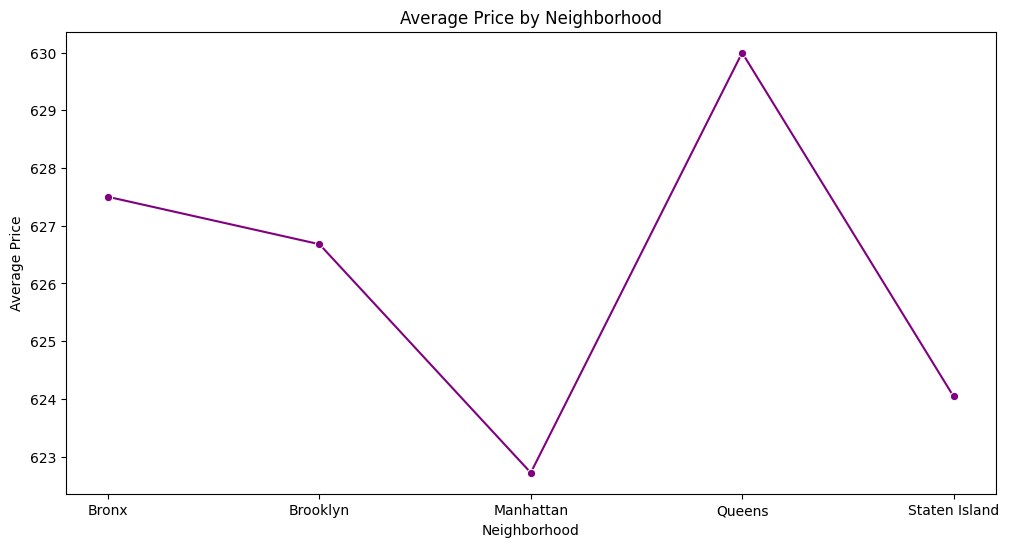

In [ ]:
# Calculate the average price for each neighborhood
avg_price_by_neighborhood = df_cleaned.groupby('neighbourhood group')['price'].mean().reset_index()

# Create a bar plot to visualize the average price for each neighborhood
plt.figure(figsize=(12, 6))
sns.lineplot(x='neighbourhood group', y='price', data=avg_price_by_neighborhood, marker='o', color='purple')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighborhood')
plt.show()

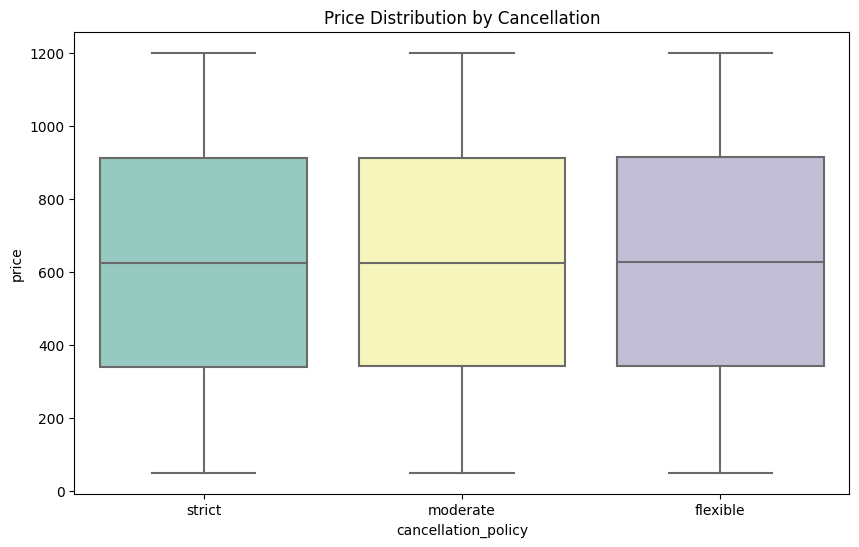

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='cancellation_policy', y='price', data=df_cleaned, palette='Set3')
plt.title('Price Distribution by Cancellation')
plt.show()

In [ ]:
df_cleaned['price'] = df_cleaned['price'].astype(int)
df_cleaned['Construction year'] = df_cleaned['Construction year'].astype(int)
df_cleaned['Construction year']

0         2020
1         2007
4         2009
5         2013
7         2009
          ... 
102594    2003
102595    2016
102596    2009
102597    2015
102598    2010
Name: Construction year, Length: 100889, dtype: int64

Generating a line plot to visualize the average price over the years

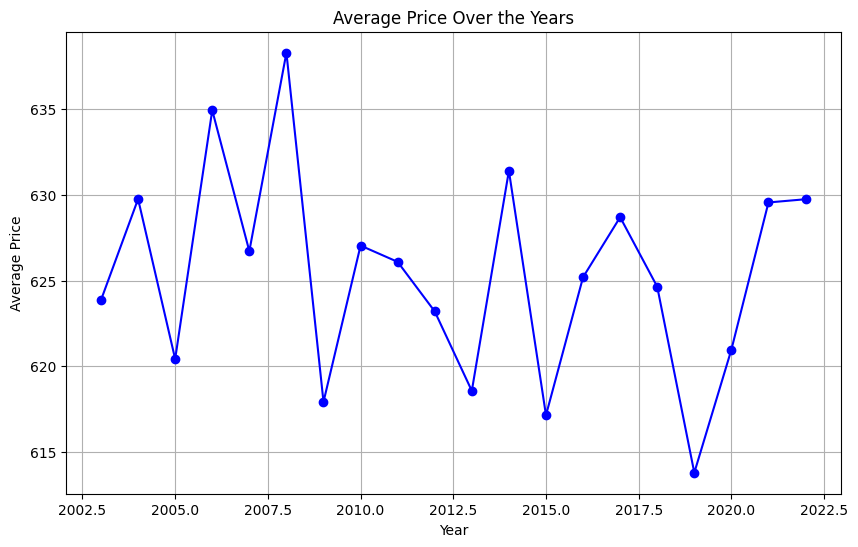

In [ ]:
plt.figure(figsize=(10, 6))
df_cleaned.groupby('Construction year')['price'].mean().plot(marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Average Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Illustrating density of price distribution across different room types

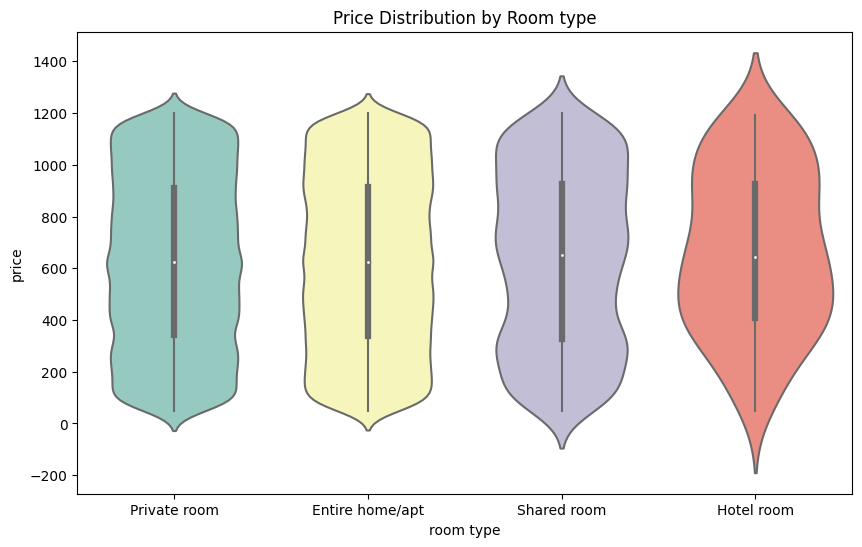

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='room type', y='price', data=df_cleaned, palette='Set3')
plt.title('Price Distribution by Room type')
plt.show()

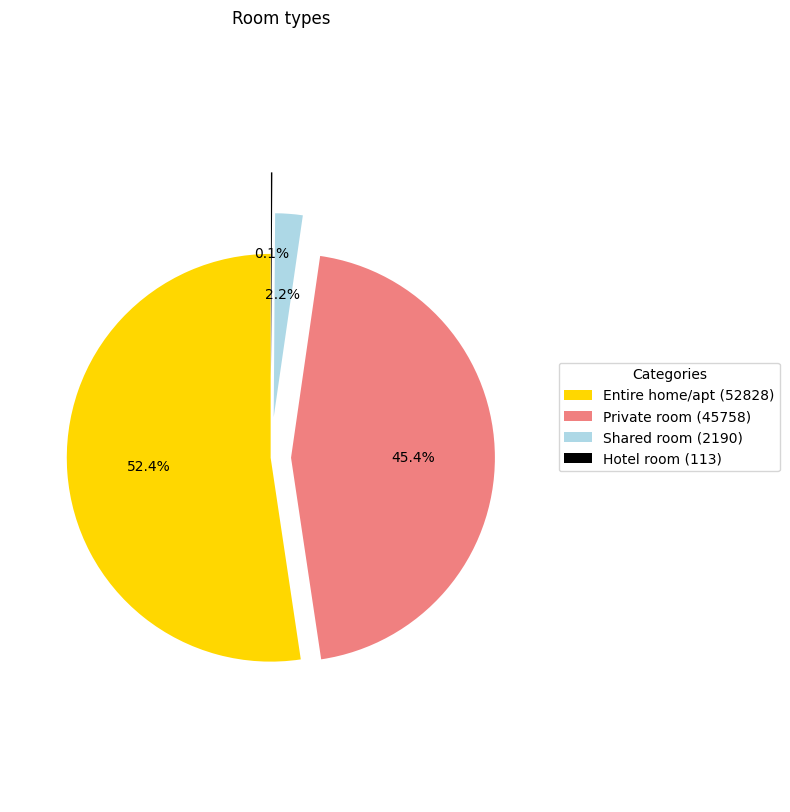

In [ ]:
value_counts = df_cleaned['room type'].value_counts()


# Plot a pie chart
labels = value_counts.index
sizes = value_counts.values
explode = (0, 0.1, 0.2, 0.4)  # Only "explode" the 2nd slice (i.e., 'Hogs')
colors = ['gold', 'lightcoral', 'lightblue', 'black']  # Specify custom colors

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=None, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)  # Use custom colors
legend_labels = [f'{label} ({count})' for label, count in zip(value_counts.index, value_counts)]
plt.legend(legend_labels, title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title('Room types')
plt.show()

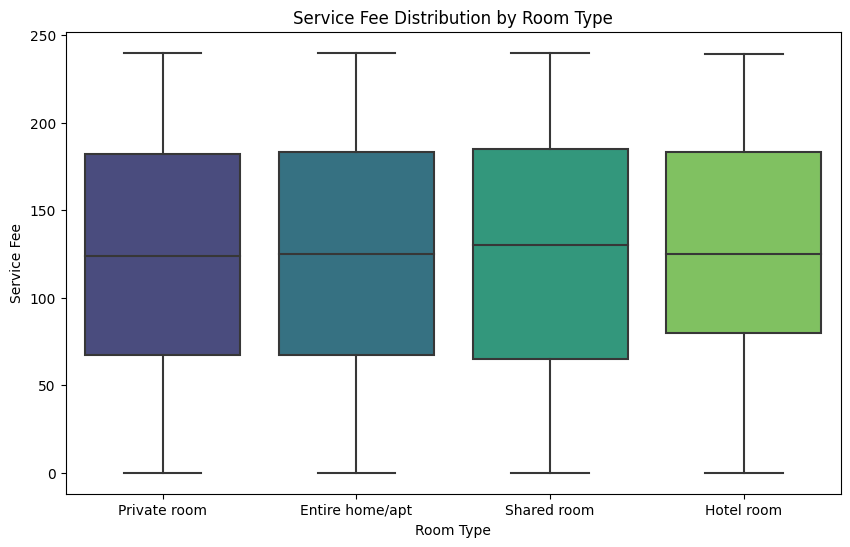

In [ ]:
# Create a box plot to visualize the distribution of service fees for each room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='service fee', data=df_cleaned, palette='viridis')
plt.xlabel('Room Type')
plt.ylabel('Service Fee')
plt.title('Service Fee Distribution by Room Type')
plt.show()

In [ ]:
df_cleaned['host_identity_verified'].value_counts()

unconfirmed    50451
verified       50438
Name: host_identity_verified, dtype: int64

Visualizing the average service fee over the years

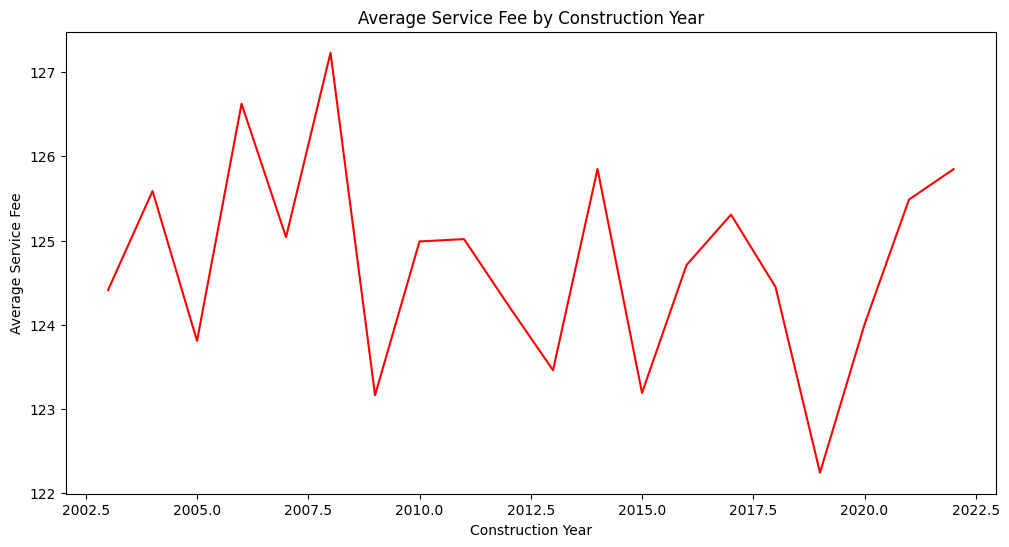

In [ ]:
# Calculate the average service fee for each construction year
avg_service_fee = df_cleaned.groupby('Construction year')['service fee'].mean().reset_index()

# Create a bar plot to visualize the average service fee for each construction year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Construction year', y='service fee', data=avg_service_fee, color='red')
plt.xlabel('Construction Year')
plt.ylabel('Average Service Fee')
plt.title('Average Service Fee by Construction Year')
plt.show()

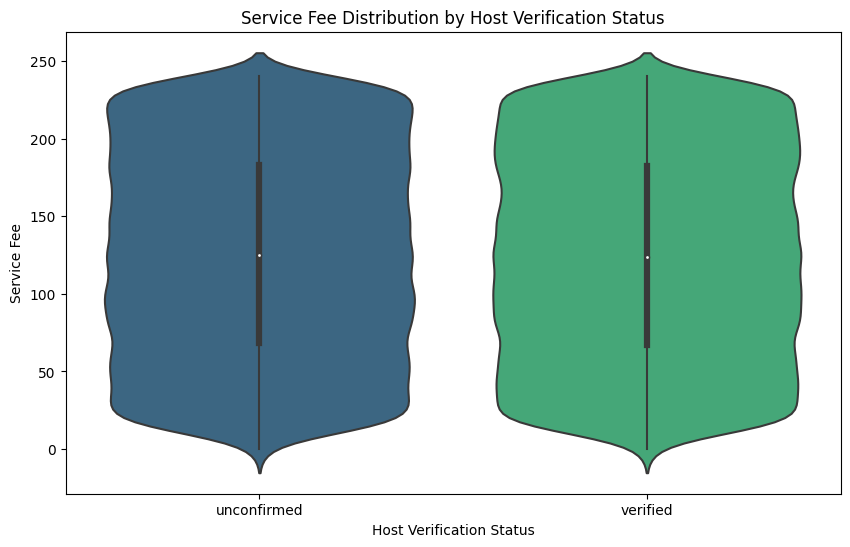

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='host_identity_verified', y='service fee', data=df_cleaned, palette='viridis')
plt.xlabel('Host Verification Status')
plt.ylabel('Service Fee')
plt.title('Service Fee Distribution by Host Verification Status')
plt.show()

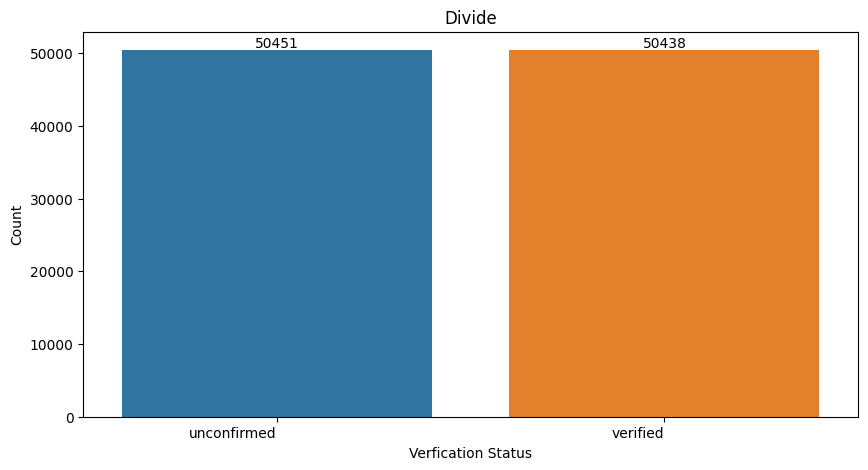

In [ ]:
counts = df_cleaned['host_identity_verified'].value_counts()
# Plot a bar graph
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Verfication Status')
plt.ylabel('Count')
plt.title('Divide')
for i, count in enumerate(counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Rotate x-axis labels
plt.xticks(ha='right')
plt.show()

Comparing the distribution of review rates between 'unconfirmed' and 'verified' categories

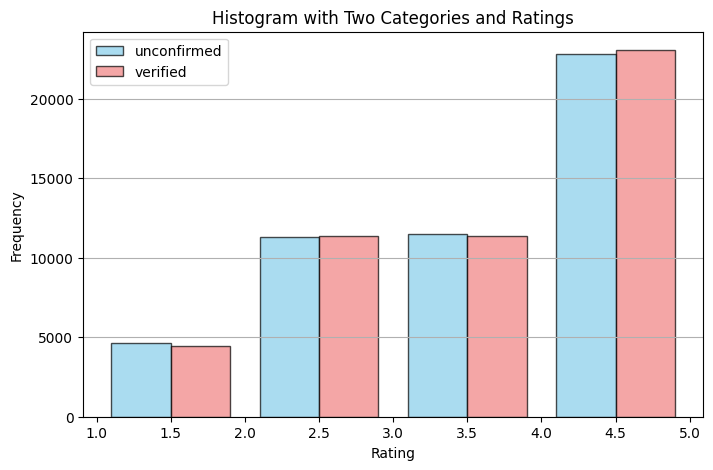

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist([df_cleaned[df_cleaned['host_identity_verified'] == 'unconfirmed']['review rate number'],
          df_cleaned[df_cleaned['host_identity_verified'] == 'verified']['review rate number']],
         bins=[1, 2, 3, 4, 5],  # Specify bin edges
         color=['skyblue', 'lightcoral'],
         label=['unconfirmed', 'verified'],
         alpha=0.7,  # Set transparency
         edgecolor='black')  # Set edge color for bins

# Customize the plot
plt.title('Histogram with Two Categories and Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.show()

Top 25 hosts with the most 5-star ratings

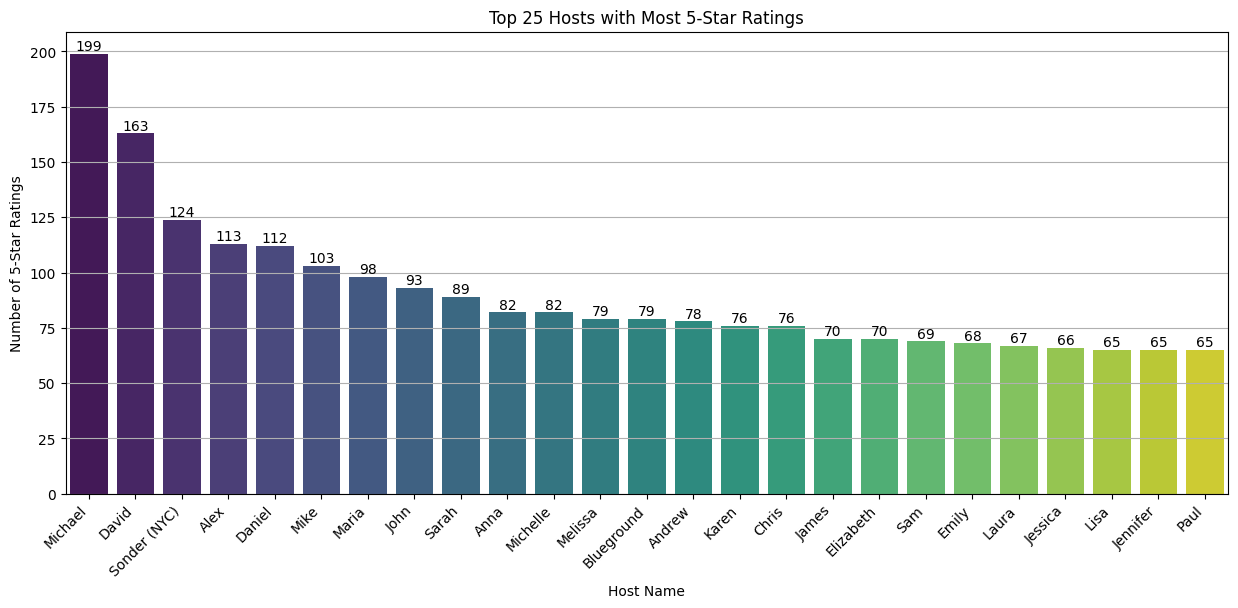

In [ ]:
# Calculate the count of 5-star ratings for each host
count_5_star = df_cleaned[df_cleaned['review rate number'] == 5].groupby('host name').size().sort_values(ascending=False)

# Select the top 25 hosts with the most 5-star ratings
top_hosts = count_5_star.head(25)
colors = sns.color_palette("viridis", len(top_hosts))
plt.figure(figsize=(15
                    , 6))
sns.barplot(x=top_hosts.index, y=top_hosts, palette='viridis')

# Annotate the count of 5-star ratings on top of each bar
for index, value in enumerate(top_hosts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Customize the plot
plt.xlabel('Host Name')
plt.ylabel('Number of 5-Star Ratings')
plt.title('Top 25 Hosts with Most 5-Star Ratings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

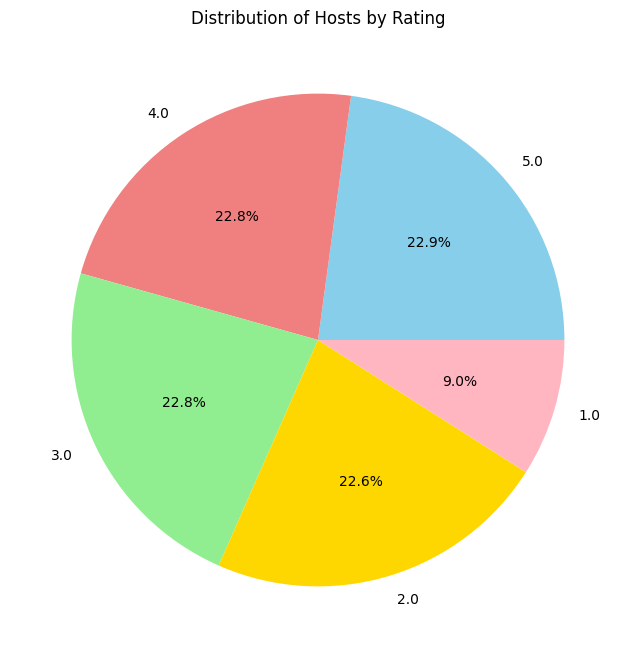

In [ ]:
review_rate_counts = df_cleaned['review rate number'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(review_rate_counts, labels=review_rate_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink'])

# Customize the plot
plt.title('Distribution of Hosts by Rating')

# Show the plot
plt.show()


# Pre-processing

In [ ]:
df_cleaned["reviews per month"].fillna(df_cleaned["reviews per month"].median(), inplace=True)
df_cleaned["number of reviews"].fillna(df_cleaned["number of reviews"].median(), inplace=True)
df_cleaned["review rate number"].fillna(df_cleaned["review rate number"].median(), inplace=True)
df_cleaned["calculated host listings count"].fillna(df_cleaned["calculated host listings count"].median(),inplace=True)
df_cleaned["availability 365"].fillna(df_cleaned["availability 365"].median(),inplace=True)

In [ ]:
df_cleaned.isna().sum()

id                                    0
NAME                                  0
host id                               0
host_identity_verified                0
host name                             0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                                 0
service fee                           0
minimum nights                        0
number of reviews                     0
last review                       15661
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                      0
dtype: int64

In [ ]:

columns_to_exclude = ['price', 'NAME', 'host name', 'neighbourhood', 'country', 'country code', 'last review']

# Drop the columns to exclude from the DataFrame
df_filtered = df_cleaned.drop(columns=columns_to_exclude, errors='ignore')

# Count the unique values in the remaining columns
unique_counts = df_filtered.nunique()

# Displaying the count of unique values for each column
print(unique_counts)

id                                100350
host id                           100350
host_identity_verified                 2
neighbourhood group                    5
lat                                21886
long                               17701
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
service fee                          232
minimum nights                       147
number of reviews                    473
reviews per month                   1015
review rate number                     5
calculated host listings count        77
availability 365                     438
dtype: int64


In [ ]:
# Forward fill null values with a limit (e.g., 10 consecutive rows)
df_cleaned['last review'] = df_cleaned['last review'].ffill(limit=10)
df_cleaned

id                                              NAME  \
0       1001254.0                Clean & quiet apt home by the park   
1       1002102.0                             Skylit Midtown Castle   
4       1003689.0  Entire Apt: Spacious Studio/Loft by central park   
5       1004098.0         Large Cozy 1 BR Apartment In Midtown East   
7       1005202.0                                   BlissArtsSpace!   
...           ...                                               ...   
102594  6092437.0                        Spare room in Williamsburg   
102595  6092990.0                     Best Location near Columbia U   
102596  6093542.0                    Comfy, bright room in Brooklyn   
102597  6094094.0                  Big Studio-One Stop from Midtown   
102598  6094647.0                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline            Brooklyn   
1       52335172823               verified        Jenna           Manhattan   
4       92037596077               verified       Lyndon           Manhattan   
5       45498551794               verified     Michelle           Manhattan   
7       90821839709            unconfirmed         Emma            Brooklyn   
...             ...                    ...          ...                 ...   
102594  12312296767               verified         Krik            Brooklyn   
102595  77864383453            unconfirmed        Mifan           Manhattan   
102596  69050334417            unconfirmed        Megan            Brooklyn   
102597  11160591270            unconfirmed  Christopher              Queens   
102598  68170633372            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long        country  ...  \
0                Kensington  40.64749 -73.97237  United States  ...   
1                   Midtown  40.75362 -73.98377  United States  ...   
4               East Harlem  40.79851 -73.94399  United States  ...   
5               Murray Hill  40.74767 -73.97500  United States  ...   
7        Bedford-Stuyvesant  40.68688 -73.95596  United States  ...   
...                     ...       ...       ...            ...  ...   
102594         Williamsburg  40.70862 -73.94651  United States  ...   
102595  Morningside Heights  40.80460 -73.96545  United States  ...   
102596           Park Slope  40.67505 -73.98045  United States  ...   
102597     Long Island City  40.74989 -73.93777  United States  ...   
102598      Upper West Side  40.76807 -73.98342  United States  ...   

       Construction year   price service fee minimum nights  \
0                 2020.0   966.0       193.0           10.0   
1                 2007.0   142.0        28.0           30.0   
4                 2009.0   204.0        41.0           10.0   
5                 2013.0   577.0       115.0            3.0   
7                 2009.0  1060.0       212.0           45.0   
...                  ...     ...         ...            ...   
102594            2003.0   844.0       169.0            1.0   
102595            2016.0   837.0       167.0            1.0   
102596            2009.0   988.0       198.0            3.0   
102597            2015.0   546.0       109.0            2.0   
102598            2010.0  1032.0       206.0            1.0   

        number of reviews  last review  reviews per month  review rate number  \
0                     9.0   2021-10-19               0.21                 4.0   
1                    45.0   2022-05-21               0.38                 4.0   
4                     9.0   2018-11-19               0.10                 3.0   
5                    74.0   2019-06-22               0.59                 3.0   
7                    49.0   2017-10-05               0.40                 5.0   
...                   ...          ...                ...                 ...   
102594                0.0   2015-09-

Identifying outliers and removing them

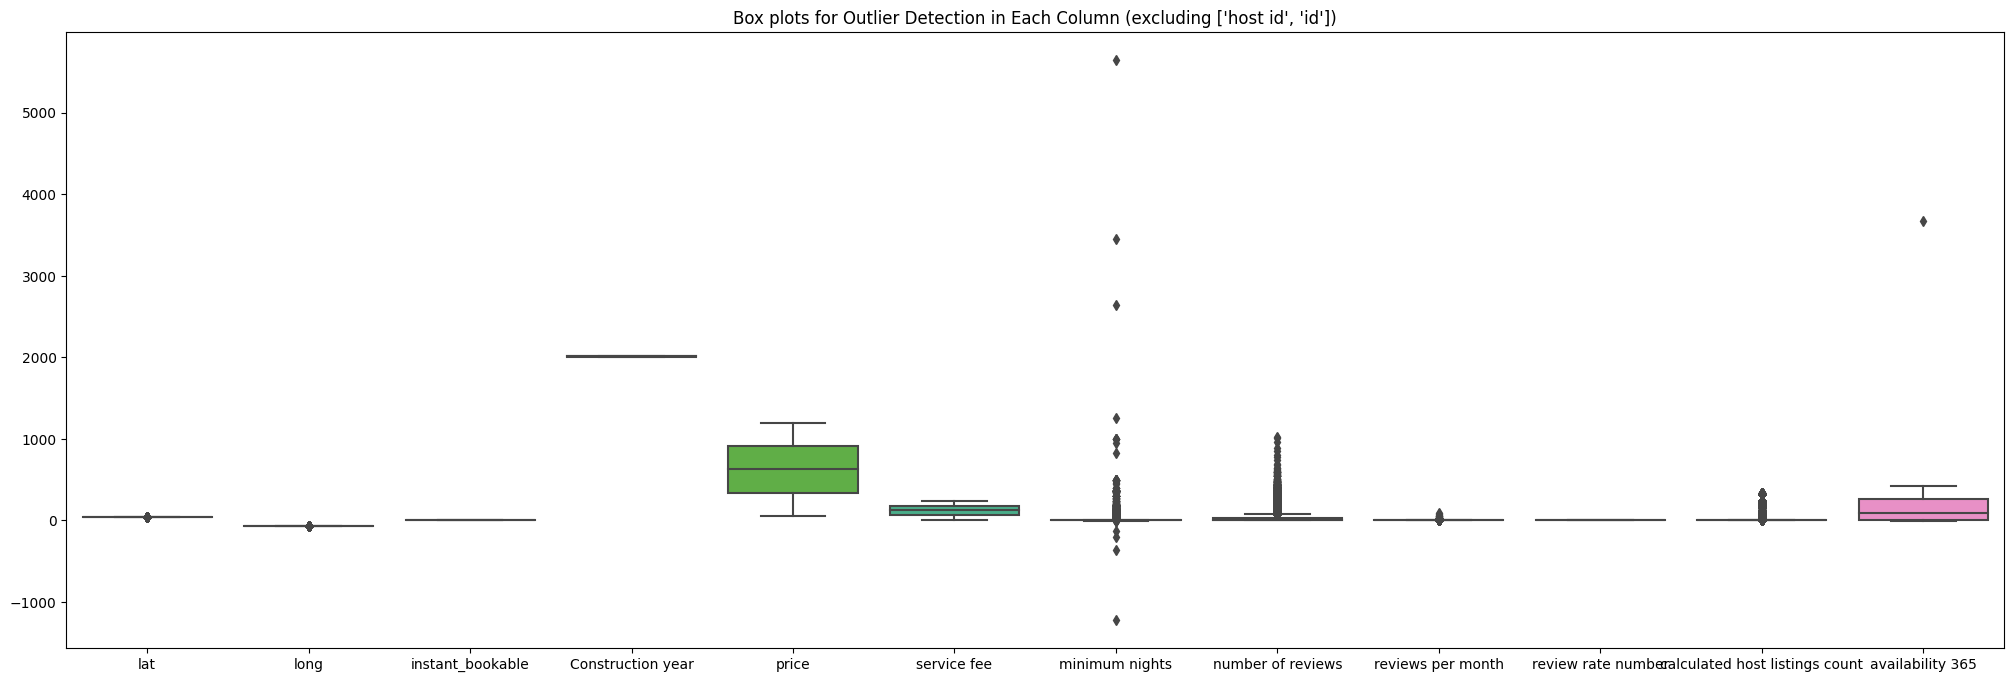

In [ ]:
column_to_exclude = ['host id','id']  # Replace with the actual column name to exclude

# Create a subset of the DataFrame excluding the specified column
df_subset = df_cleaned.drop(column_to_exclude, axis=1)

# Plot box plots for each column except the specified one
plt.figure(figsize=(25, 8))
sns.boxplot(data=df_subset)
plt.title(f'Box plots for Outlier Detection in Each Column (excluding {column_to_exclude})')
plt.show()

In [ ]:
# Columns to exclude from outlier detection
columns_to_exclude = ['last review']  # Replace with the actual column names to exclude

# Calculate the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR)
Q1 = df_cleaned.drop(columns=columns_to_exclude).quantile(0.25)
Q3 = df_cleaned.drop(columns=columns_to_exclude).quantile(0.75)
IQR = Q3 - Q1

# Define a mask for the outliers using the IQR method (excluding specified columns)
outliers_mask = (
    (df_cleaned.drop(columns=columns_to_exclude) < (Q1 - 1.5 * IQR)) |
    (df_cleaned.drop(columns=columns_to_exclude) > (Q3 + 1.5 * IQR))
).any(axis=1)

# Count the number of outliers in the dataset
num_outliers = outliers_mask.sum()

# Filter out the outliers using the mask
df_clean = df_cleaned[~outliers_mask]

# Return the number of outliers detected and the first few rows of the cleaned dataset
num_outliers

<ipython-input-28-887df528e233>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_cleaned.drop(columns=columns_to_exclude).quantile(0.25)
<ipython-input-28-887df528e233>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_cleaned.drop(columns=columns_to_exclude).quantile(0.75)
<ipython-input-28-887df528e233>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df_cleaned.drop(columns=columns_to_exclude) < (Q1 - 1.5 * IQR)) |
<ipython-input-28-887df528e233>:12

42944

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Perform One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['host_identity_verified','instant_bookable','cancellation_policy','room type','neighbourhood group'])
# Display the DataFrame with One-Hot Encoded columns
df_encoded

id                                              NAME  \
0       1001254.0                Clean & quiet apt home by the park   
1       1002102.0                             Skylit Midtown Castle   
4       1003689.0  Entire Apt: Spacious Studio/Loft by central park   
5       1004098.0         Large Cozy 1 BR Apartment In Midtown East   
7       1005202.0                                   BlissArtsSpace!   
...           ...                                               ...   
102594  6092437.0                        Spare room in Williamsburg   
102595  6092990.0                     Best Location near Columbia U   
102596  6093542.0                    Comfy, bright room in Brooklyn   
102597  6094094.0                  Big Studio-One Stop from Midtown   
102598  6094647.0                              585 sf Luxury Studio   

            host id    host name        neighbourhood       lat      long  \
0       80014485718     Madaline           Kensington  40.64749 -73.97237   
1       52335172823        Jenna              Midtown  40.75362 -73.98377   
4       92037596077       Lyndon          East Harlem  40.79851 -73.94399   
5       45498551794     Michelle          Murray Hill  40.74767 -73.97500   
7       90821839709         Emma   Bedford-Stuyvesant  40.68688 -73.95596   
...             ...          ...                  ...       ...       ...   
102594  12312296767         Krik         Williamsburg  40.70862 -73.94651   
102595  77864383453        Mifan  Morningside Heights  40.80460 -73.96545   
102596  69050334417        Megan           Park Slope  40.67505 -73.98045   
102597  11160591270  Christopher     Long Island City  40.74989 -73.93777   
102598  68170633372      Rebecca      Upper West Side  40.76807 -73.98342   

              country country code  Construction year  ...  \
0       United States           US             2020.0  ...   
1       United States           US             2007.0  ...   
4       United States           US             2009.0  ...   
5       United States           US             2013.0  ...   
7       United States           US             2009.0  ...   
...               ...          ...                ...  ...   
102594  United States           US             2003.0  ...   
102595  United States           US             2016.0  ...   
102596  United States           US             2009.0  ...   
102597  United States           US             2015.0  ...   
102598  United States           US             2010.0  ...   

        cancellation_policy_strict  room type_Entire home/apt  \
0                                1                          0   
1                                0                          1   
4                                0                          1   
5                                0                          1   
7                                0                          0   
...                            ...                        ...   
102594                           0                          0   
102595                           0                          0   
102596                           0                          0   
102597                           1                          1   
102598                           0                          1   

        room type_Hotel room  room type_Private room room type_Shared room  \
0                          0                       1                     0   
1                          0                       0                     0   
4                          0                       0                     0   
5                          0                       0                     0   
7                          0                       1                     0   
...                      ...                     ...                   ...   
102594                     0                       1                     0   
102595                     0                       1                     0   
102596   

PCA

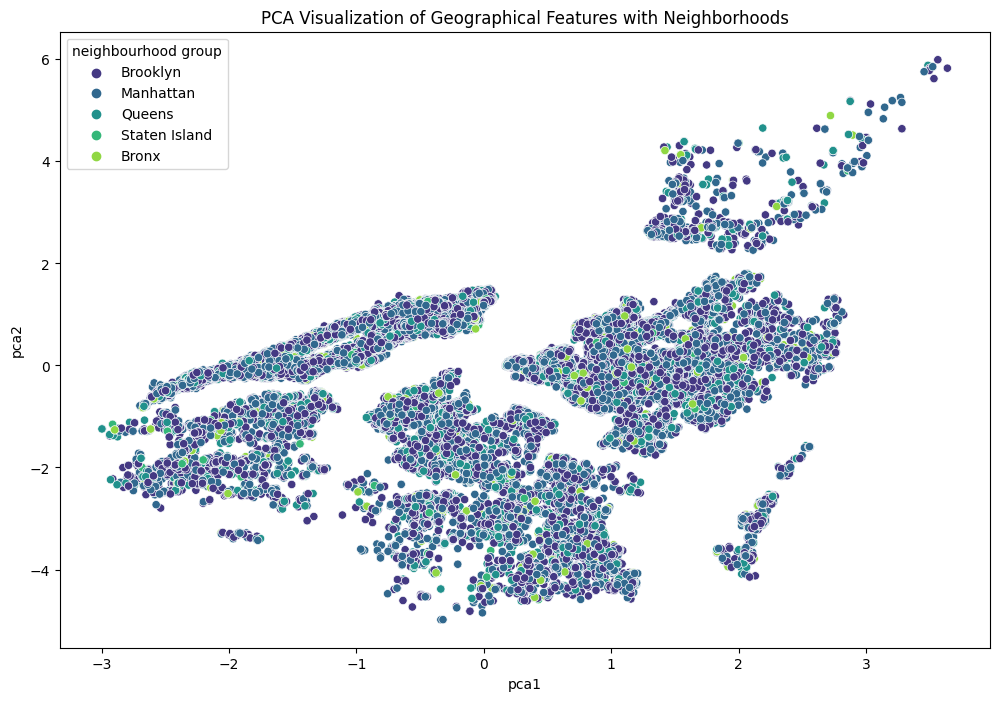

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define features for geographical PCA including 'neighbourhood'
geographical_features = ['lat', 'long', 'neighbourhood group']

# Extract the selected features
X_geo = df_cleaned[geographical_features]

# Separate numerical and categorical features
numerical_features = ['lat', 'long']
categorical_features = ['neighbourhood group']

# Standardize numerical features
numerical_transformer = StandardScaler()

# One-hot encode categorical features
categorical_transformer = OneHotEncoder(drop='first')

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_geo_standardized_encoded = preprocessor.fit_transform(X_geo)

# Apply PCA for geographical features
pca_geo = PCA(n_components=2, random_state=42)
X_pca_geo = pca_geo.fit_transform(X_geo_standardized_encoded)

# Create a DataFrame for the PCA results
pca_geo_df = pd.DataFrame(data=X_pca_geo, columns=['pca1', 'pca2'])

# Visualize PCA results for geographical features including 'neighbourhood'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca1', y='pca2', hue=df_cleaned['neighbourhood group'], palette='viridis', data=pca_geo_df)
plt.title('PCA Visualization of Geographical Features with Neighborhoods')
plt.show()


In [ ]:
df = df_encoded.copy()

In [ ]:
df.columns

Index(['id', 'NAME', 'host id', 'host name', 'neighbourhood', 'lat', 'long',
       'country', 'country code', 'Construction year', 'price', 'service fee',
       'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365',
       'host_identity_verified_unconfirmed', 'host_identity_verified_verified',
       'instant_bookable_False', 'instant_bookable_True',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'room type_Entire home/apt',
       'room type_Hotel room', 'room type_Private room',
       'room type_Shared room', 'neighbourhood group_Bronx',
       'neighbourhood group_Brooklyn', 'neighbourhood group_Manhattan',
       'neighbourhood group_Queens', 'neighbourhood group_Staten Island'],
      dtype='object')

In [ ]:
df.dtypes

id                                           float64
NAME                                          object
host id                                        int64
host name                                     object
neighbourhood                                 object
lat                                          float64
long                                         float64
country                                       object
country code                                  object
Construction year                            float64
price                                        float64
service fee                                  float64
minimum nights                               float64
number of reviews                            float64
last review                           datetime64[ns]
reviews per month                            float64
review rate number                           float64
calculated host listings count               float64
availability 365                             f

In [ ]:
# id                                100350
# host id                           100350
# host_identity_verified                 2
# neighbourhood group                    5
# lat                                21886
# long                               17701
# instant_bookable                       2
# cancellation_policy                    3
# room type                              4
# Construction year                     20
# service fee                          232
# minimum nights                       147
# number of reviews                    473
# reviews per month                   1015
# review rate number                     5
# calculated host listings count        77
# availability 365                     438
# dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop(['price', 'NAME', 'host name', 'neighbourhood', 'country', 'country code', 'last review','host id','id','reviews per month'], axis=1)
y = df['price']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the training, validation, and testing sets
print("Shape of Training Set:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

print("\nShape of Validation Set:")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

print("\nShape of Test Set:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Shape of Training Set:
X_train: (80711, 25), y_train: (80711,)

Shape of Validation Set:
X_val: (10089, 25), y_val: (10089,)

Shape of Test Set:
X_test: (10089, 25), y_test: (10089,)


Standardization

In [ ]:
from sklearn.preprocessing import QuantileTransformer, RobustScaler, StandardScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Model Training

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def evaluate_model(model, X, y, cv_folds=5):
    # Define scoring functions
    scoring_funcs = {
        'mse': make_scorer(mean_squared_error, greater_is_better=False),
        'mae': make_scorer(mean_absolute_error, greater_is_better=False),
        'r2': 'r2'
    }

    # Initialize a dictionary to store the cross-validation scores
    cv_scores = {}

    # Perform cross-validation and store the results
    for metric_name, scorer in scoring_funcs.items():
        score_values = cross_val_score(model, X, y, cv=cv_folds, scoring=scorer)
        if metric_name in ['mse', 'mae']:  # These were negated to make them negative for maximization
            score_values = -score_values  # Convert back to positive for reporting
        cv_scores[metric_name] = score_values

    # Display the metrics
    for metric_name, scores in cv_scores.items():
        print(f'{metric_name.upper()} scores for each fold:', scores)
        print(f'Average {metric_name.upper()} score from cross-validation:', scores.mean())

In [ ]:
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression()
model1 = model_reg.fit(X_train, y_train)
print("\n*********Evaluation of test set**********")
evaluate_model(model_reg, X_test, y_test)
print("\n*********Evaluation of validation set****")
evaluate_model(model_reg, X_val, y_val)
reg_score = model_reg.score(X_train,y_train)
print("\nAccuracy:")
reg_score


*********Evaluation of test set**********
MSE scores for each fold: [1510.35336617   82.52153259  549.14995679 3921.84380425 2398.32493665]
Average MSE score from cross-validation: 1692.438719292349
MAE scores for each fold: [6.03253971 4.87207995 5.34204583 7.2410516  6.20151145]
Average MAE score from cross-validation: 5.937845707958251
R2 scores for each fold: [0.9858986  0.99926458 0.99514256 0.9625714  0.97844109]
Average R2 score from cross-validation: 0.9842636468528114

*********Evaluation of validation set****
MSE scores for each fold: [1021.86993031 2693.53748028 2104.05042928 1309.25385087 1175.83284332]
Average MSE score from cross-validation: 1660.908906811491
MAE scores for each fold: [5.97152911 7.05741326 6.06914833 5.60900547 5.71816153]
Average MAE score from cross-validation: 6.085051539946813
R2 scores for each fold: [0.9907086  0.97538268 0.98089659 0.98811369 0.98924734]
Average R2 score from cross-validation: 0.9848697795685233

Accuracy:


0.9859908518413057

In [ ]:
#FOR SELECTING APHA IN RIDGE
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a set of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Set up GridSearchCV to find the best alpha
ridge = Ridge()
grid = GridSearchCV(estimator=ridge, param_grid=dict(alpha=alpha_values), scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

# Best alpha value
print("Best alpha:", grid.best_estimator_.alpha)

Best alpha: 10


In [ ]:
from sklearn.linear_model import Ridge

# alpha is the regularization strength
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
print("\n*********Evaluation of test set**********")
evaluate_model(ridge_reg, X_test, y_test)
print("\n*********Evaluation of validation set****")
evaluate_model(ridge_reg, X_val, y_val)
ridge_score = ridge_reg.score(X_train,y_train)
print("\nAccuracy:")
ridge_score


*********Evaluation of test set**********
MSE scores for each fold: [1509.96717807   94.59082741  557.32243937 3908.62005997 2397.47331203]
Average MSE score from cross-validation: 1693.5947633699452
MAE scores for each fold: [6.88597378 5.8107515  6.27443713 8.02705896 7.0804789 ]
Average MAE score from cross-validation: 6.815740054351115
R2 scores for each fold: [0.98590221 0.99915702 0.99507027 0.9626976  0.97844875]
Average R2 score from cross-validation: 0.9842551699064831

*********Evaluation of validation set****
MSE scores for each fold: [1026.5614306  2688.0215309  2104.06362038 1313.30298544 1179.27305443]
Average MSE score from cross-validation: 1662.2445243494778
MAE scores for each fold: [6.83204764 7.93042658 6.94592014 6.51511132 6.58441686]
Average MAE score from cross-validation: 6.961584508284213
R2 scores for each fold: [0.99066594 0.97543309 0.98089647 0.98807693 0.98921588]
Average R2 score from cross-validation: 0.9848576624544373

Accuracy:


0.9859906830329332

In [ ]:
# Get the coefficients (feature importance)
coefficients = ridge_reg.coef_

# Print or visualize feature importance
print("Feature Importance:")
for i, importance in enumerate(coefficients):
    print(f"Feature {i}: {importance}")

Feature Importance:
Feature 0: 0.27988383906274567
Feature 1: 0.17991320104815045
Feature 2: -0.13957622643111306
Feature 3: 568.2399415980858
Feature 4: 0.04982092877709579
Feature 5: -0.10394995829349161
Feature 6: 0.05699593698620526
Feature 7: -0.0031616842064989548
Feature 8: 0.22110904855393868
Feature 9: -0.08818702984475316
Feature 10: 0.08818702984475421
Feature 11: 0.10971688122546056
Feature 12: -0.10971688122557265
Feature 13: -0.010204597143593567
Feature 14: 0.13262712522519562
Feature 15: -0.12242252808324071
Feature 16: -5.161959746763411
Feature 17: 15.635784625027881
Feature 18: -5.010416257381033
Feature 19: -5.463408620996441
Feature 20: -0.4435997557839639
Feature 21: 0.7640571520060634
Feature 22: 0.004313022873033552
Feature 23: -0.10591559987201528
Feature 24: -0.21885481923121616


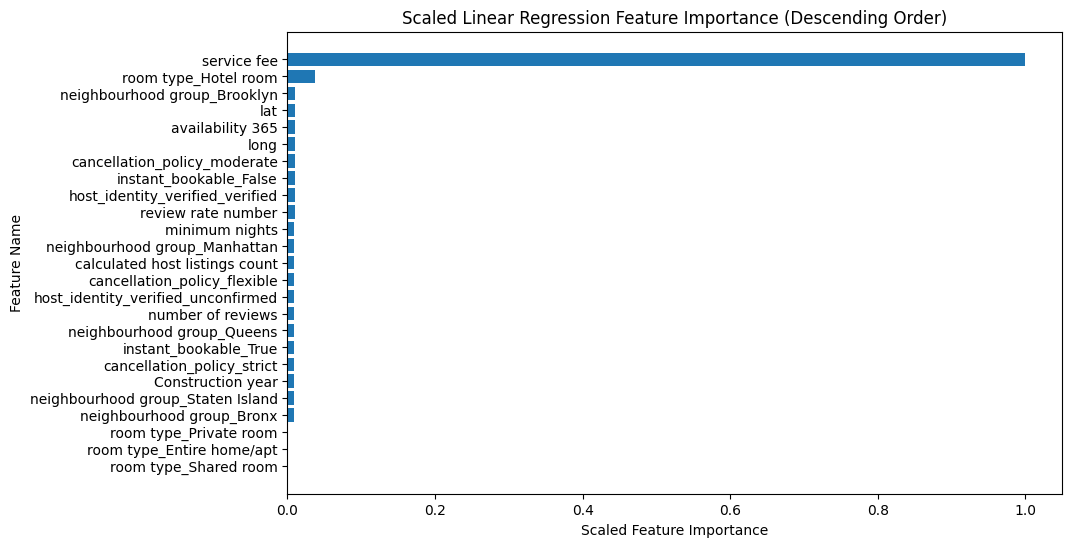

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Use Min-Max scaling to scale the coefficients to [0, 1]
scaler = MinMaxScaler()
scaled_coefficients = scaler.fit_transform(coefficients.reshape(-1, 1)).flatten()

# Get feature names
feature_names = X.columns

# Create a DataFrame for easier sorting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': scaled_coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar graph with scaled values
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Scaled Feature Importance')
plt.ylabel('Feature Name')
plt.title('Scaled Linear Regression Feature Importance (Descending Order)')
plt.show()

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 2.5 MB/s eta 0:00:00


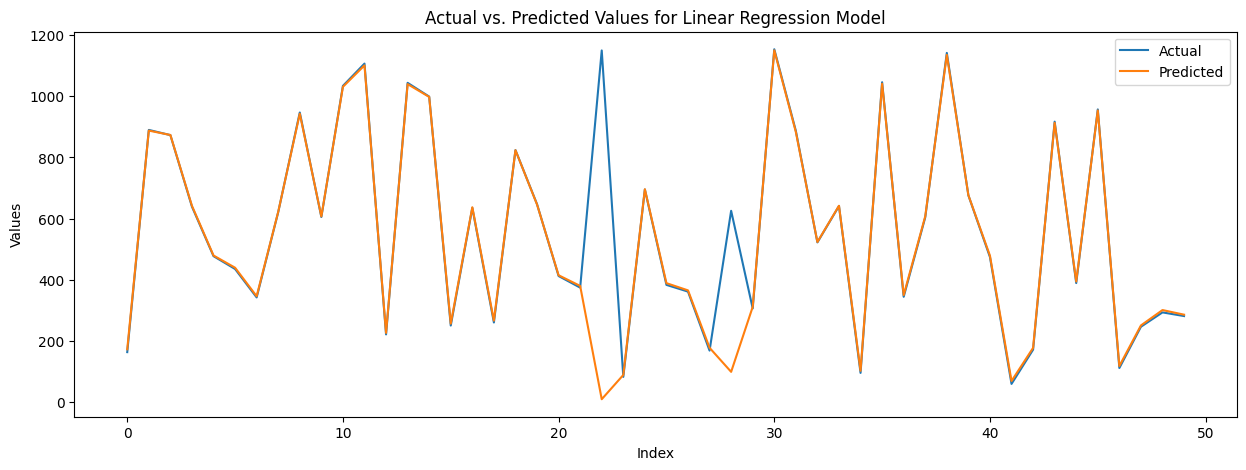

In [ ]:
y_pred_train = ridge_reg.predict(X_train)
y_pred_val = ridge_reg.predict(X_val)
y_pred_test = ridge_reg.predict(X_test)

# Concatenate the predictions and actual values for training, validation, and test sets
df_train = pd.DataFrame({"Set": "Train", "Actual": y_train, "Predicted": y_pred_train})
df_val = pd.DataFrame({"Set": "Validation", "Actual": y_val, "Predicted": y_pred_val})
df_test = pd.DataFrame({"Set": "Test", "Actual": y_test, "Predicted": y_pred_test})

df_combined = pd.concat([df_train, df_val, df_test])

# Reset the index before plotting
df_combined_reset = df_combined.reset_index(drop=True)

# Plot the first 50 records
plt.figure(figsize=(15, 5))
plt.plot(df_combined_reset.index[:50], df_combined_reset['Actual'][:50], label='Actual')
plt.plot(df_combined_reset.index[:50], df_combined_reset['Predicted'][:50], label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values for Linear Regression Model')
plt.show()

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = model_random.fit(X_train, y_train)
print("\n*********Evaluation of test set**********")
evaluate_model(model_random, X_test, y_test)
print("\n*********Evaluation of validation set****")
evaluate_model(model_random, X_val, y_val)
random_score = model_random.score(X_train,y_train)
print("\nAccuracy:")
random_score


*********Evaluation of test set**********
MSE scores for each fold: [1339.70794975   70.76351826  305.36985275 1050.25314612  725.90910001]
Average MSE score from cross-validation: 698.40071337764
MAE scores for each fold: [3.75983881 1.86741009 2.82573412 3.89249815 3.02787106]
Average MAE score from cross-validation: 3.0746704466100687
R2 scores for each fold: [0.98749183 0.99936937 0.99729889 0.98997678 0.99347469]
Average R2 score from cross-validation: 0.9935223117363909

*********Evaluation of validation set****
MSE scores for each fold: [336.37495479 591.9227113  294.23558543 355.97758446 408.0292465 ]
Average MSE score from cross-validation: 397.3080164947446
MAE scores for each fold: [2.93695591 3.73025556 2.74758217 3.1012696  2.88095241]
Average MAE score from cross-validation: 3.0794031282463474
R2 scores for each fold: [0.9969415  0.99459018 0.99732853 0.99676819 0.99626869]
Average R2 score from cross-validation: 0.9963794169039023

Accuracy:


0.9992903287968987

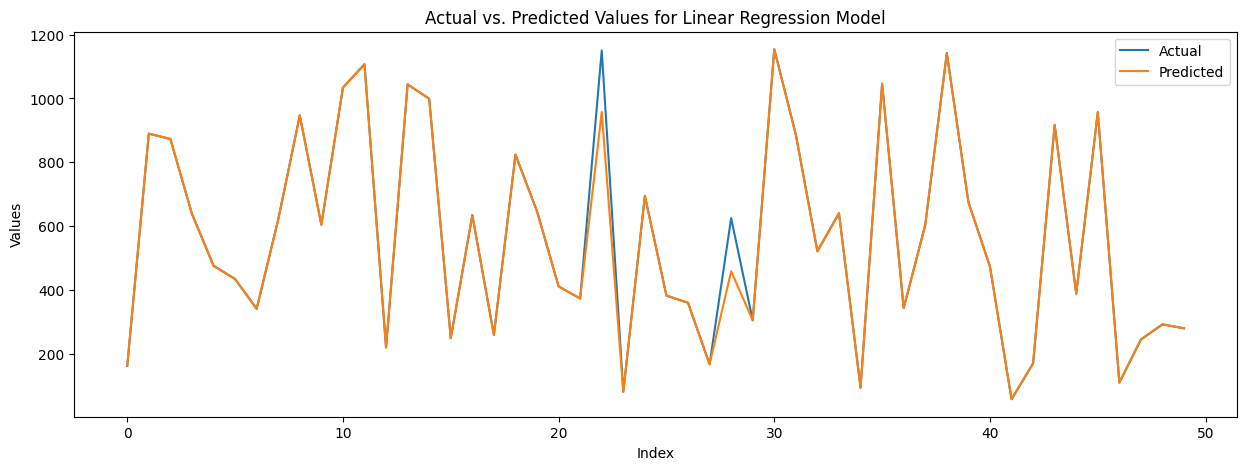

In [ ]:
y_pred_train = model_random.predict(X_train)
y_pred_val = model_random.predict(X_val)
y_pred_test = model_random.predict(X_test)

# Concatenate the predictions and actual values for training, validation, and test sets
df_train = pd.DataFrame({"Set": "Train", "Actual": y_train, "Predicted": y_pred_train})
df_val = pd.DataFrame({"Set": "Validation", "Actual": y_val, "Predicted": y_pred_val})
df_test = pd.DataFrame({"Set": "Test", "Actual": y_test, "Predicted": y_pred_test})

df_combined = pd.concat([df_train, df_val, df_test])

# Reset the index before plotting
df_combined_reset = df_combined.reset_index(drop=True)

# Plot the first 50 records
plt.figure(figsize=(15, 5))
plt.plot(df_combined_reset.index[:50], df_combined_reset['Actual'][:50], label='Actual')
plt.plot(df_combined_reset.index[:50], df_combined_reset['Predicted'][:50], label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values for Linear Regression Model')
plt.show()

RANDOM FOREST HYPER PARAMETER TUNED

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=8, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')
rf = rf_reg.fit(X_train, y_train)
print("\n*********Evaluation of test set**********")
evaluate_model(rf_reg, X_test, y_test)
print("\n*********Evaluation of validation set****")
evaluate_model(rf_reg, X_val, y_val)
random_score = rf_reg.score(X_train,y_train)
print("\nAccuracy:")
random_score


*********Evaluation of test set**********
MSE scores for each fold: [14026.60825219 13744.92945455 11632.96009838 13213.41773258
 12399.41153341]
Average MSE score from cross-validation: 13003.465414221911
MAE scores for each fold: [ 80.0964937  105.2754975   97.01739285  90.7357914   83.57519924]
Average MAE score from cross-validation: 91.34007493871107
R2 scores for each fold: [0.88269211 0.88418258 0.89703119 0.88386361 0.888383  ]
Average R2 score from cross-validation: 0.8872304971089464

*********Evaluation of validation set****
MSE scores for each fold: [11352.35456008 13635.34316037 13031.02576032 13779.85930386
 13095.5593392 ]
Average MSE score from cross-validation: 12978.828424764039
MAE scores for each fold: [94.77528655 85.40549065 96.51859029 86.61432143 77.93588459]
Average MAE score from cross-validation: 88.2499147021527
R2 scores for each fold: [0.86614156 0.88200638 0.86756581 0.88309157 0.8890503 ]
Average R2 score from cross-validation: 0.8775711256862623

Accur

0.8929765280615505

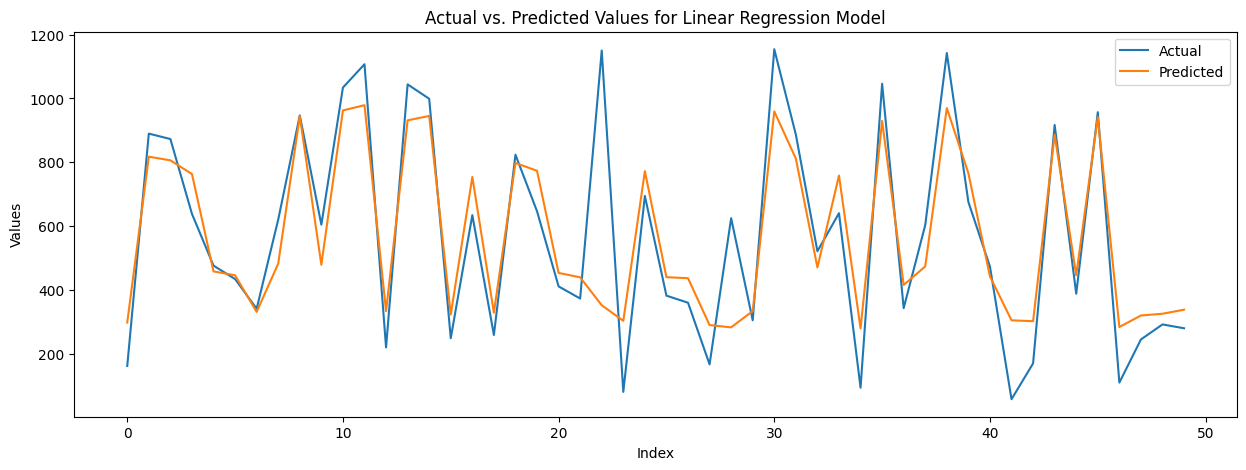

In [ ]:
y_pred_train = rf_reg.predict(X_train)
y_pred_val = rf_reg.predict(X_val)
y_pred_test = rf_reg.predict(X_test)

# Concatenate the predictions and actual values for training, validation, and test sets
df_train = pd.DataFrame({"Set": "Train", "Actual": y_train, "Predicted": y_pred_train})
df_val = pd.DataFrame({"Set": "Validation", "Actual": y_val, "Predicted": y_pred_val})
df_test = pd.DataFrame({"Set": "Test", "Actual": y_test, "Predicted": y_pred_test})

df_combined = pd.concat([df_train, df_val, df_test])

# Reset the index before plotting
df_combined_reset = df_combined.reset_index(drop=True)

# Plot the first 50 records
plt.figure(figsize=(15, 5))
plt.plot(df_combined_reset.index[:50], df_combined_reset['Actual'][:50], label='Actual')
plt.plot(df_combined_reset.index[:50], df_combined_reset['Predicted'][:50], label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values for Linear Regression Model')
plt.show()

XGBOOST

In [ ]:
from xgboost import XGBRegressor
model_xg = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
model3 = model_xg.fit(X_train, y_train)
print("\n*********Evaluation of test set**********")
evaluate_model(model_xg, X_test, y_test)
print("\n*********Evaluation of validation set****")
evaluate_model(model_xg, X_val, y_val)
xg_score = model_xg.score(X_train,y_train)
print("\nAccuracy:")
xg_score


*********Evaluation of test set**********
MSE scores for each fold: [1595.82239121   64.14318435  305.98365397 1239.18358915  871.95175658]
Average MSE score from cross-validation: 815.4169150528039
MAE scores for each fold: [4.66932496 2.58151099 3.25995736 4.88721562 3.86837491]
Average MAE score from cross-validation: 3.853276766763453
R2 scores for each fold: [0.98510062 0.99942837 0.99729346 0.9881737  0.99216189]
Average R2 score from cross-validation: 0.992431607663713

*********Evaluation of validation set****
MSE scores for each fold: [322.69119828 672.20969047 225.9457783  332.77094769 349.50791725]
Average MSE score from cross-validation: 380.62510639615334
MAE scores for each fold: [3.54702388 4.6875054  3.49535902 3.79143417 3.72783528]
Average MAE score from cross-validation: 3.8498315489684445
R2 scores for each fold: [0.99706592 0.9938564  0.99794856 0.99697888 0.99680385]
Average R2 score from cross-validation: 0.9965307207313041

Accuracy:


0.996518372014036

XGBOOST WITH HYPER PARAMETER TUNING

In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(alpha=1.0, reg_lambda=10)
xgb_reg.fit(X_train, y_train)
print("\n*********Evaluation of test set**********")
evaluate_model(xgb_reg, X_test, y_test)
print("\n*********Evaluation of validation set****")
evaluate_model(xgb_reg, X_val, y_val)
xg_score = xgb_reg.score(X_train,y_train)
print("\nAccuracy:")
xg_score


*********Evaluation of test set**********
MSE scores for each fold: [1688.09532056   63.47637763  225.62436117 1057.54117118  884.59586528]
Average MSE score from cross-validation: 783.8666191639911
MAE scores for each fold: [4.70599806 2.52337859 2.89829727 4.70487486 4.00416591]
Average MAE score from cross-validation: 3.7673429394738376
R2 scores for each fold: [0.98423912 0.99943431 0.99800427 0.98990722 0.99204823]
Average R2 score from cross-validation: 0.9927266302644163

*********Evaluation of validation set****
MSE scores for each fold: [335.52901948 671.92766461 228.1803057  328.92610817 346.64886273]
Average MSE score from cross-validation: 382.242392138499
MAE scores for each fold: [3.53977912 4.56596591 3.61316465 3.87246716 3.69146869]
Average MAE score from cross-validation: 3.8565691072476405
R2 scores for each fold: [0.99694919 0.99385898 0.99792827 0.99701378 0.99682999]
Average R2 score from cross-validation: 0.9965160432086743

Accuracy:


0.9984737851822866

SVR

In [ ]:
from sklearn.svm import SVR

# Create and train the Support Vector Regression (SVR) model
model_svr = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
model4 = model_svr.fit(X_train, y_train)
print("\n*********Evaluation of test set**********")
evaluate_model(model_svr, X_test, y_test)
print("\n*********Evaluation of validation set****")
evaluate_model(model_svr, X_val, y_val)
svr_score = model_svr.score(X_train,y_train)
print("\nAccuracy:")
svr_score


*********Evaluation of test set**********
MSE scores for each fold: [1523.32904346   52.77383013  538.97108103 3952.8250687  2410.05141988]
Average MSE score from cross-validation: 1695.5900886403476
MAE scores for each fold: [3.59285863 1.4401634  2.22329573 5.70079732 3.78386429]
Average MAE score from cross-validation: 3.348195875266387
R2 scores for each fold: [0.98577746 0.99952969 0.9952326  0.96227572 0.97833568]
Average R2 score from cross-validation: 0.9842302289542701

*********Evaluation of validation set****
MSE scores for each fold: [1013.64099918 2726.95310263 2122.6175475  1319.01881539 1181.19634103]
Average MSE score from cross-validation: 1672.6853611469323
MAE scores for each fold: [2.94259747 4.8310548  3.63640521 2.88423917 2.98605614]
Average MAE score from cross-validation: 3.4560705573360595
R2 scores for each fold: [0.99078342 0.97507728 0.98072802 0.98802504 0.98919829]
Average R2 score from cross-validation: 0.984762408565565

Accuracy:


0.9858293907429259

SVR WITH HYPER PARAMETER TUNING

In [ ]:
from sklearn.svm import SVR

# Create and train the Support Vector Regression (SVR) model
model_svr = SVR(C=0.1, kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
model4 = model_svr.fit(X_train, y_train)
print("\n*********Evaluation of test set**********")
evaluate_model(model_svr, X_test, y_test)
print("\n*********Evaluation of validation set****")
evaluate_model(model_svr, X_val, y_val)
svr_score = model_svr.score(X_train,y_train)
print("\nAccuracy:")
svr_score


*********Evaluation of test set**********
MSE scores for each fold: [10750.515083   11082.29625898 11232.55368345 11929.66959041
 12123.50470185]
Average MSE score from cross-validation: 11423.70786353594
MAE scores for each fold: [87.37614283 91.25611644 91.28897127 86.65600472 90.9454585 ]
Average MAE score from cross-validation: 89.50453875187375
R2 scores for each fold: [0.89962794 0.90123647 0.90064379 0.88614771 0.89101998]
Average R2 score from cross-validation: 0.8957351792307927

*********Evaluation of validation set****
MSE scores for each fold: [10963.72959111 11898.66771642 11804.26365177 11238.95534369
 10910.90014627]
Average MSE score from cross-validation: 11363.303289854599
MAE scores for each fold: [89.24633406 89.85519536 90.10066575 89.47507439 88.86185908]
Average MAE score from cross-validation: 89.50782572902759
R2 scores for each fold: [0.90031179 0.89125328 0.89282498 0.897965   0.90022288]
Average R2 score from cross-validation: 0.8965155856292695

Accuracy:


0.9858344658476479

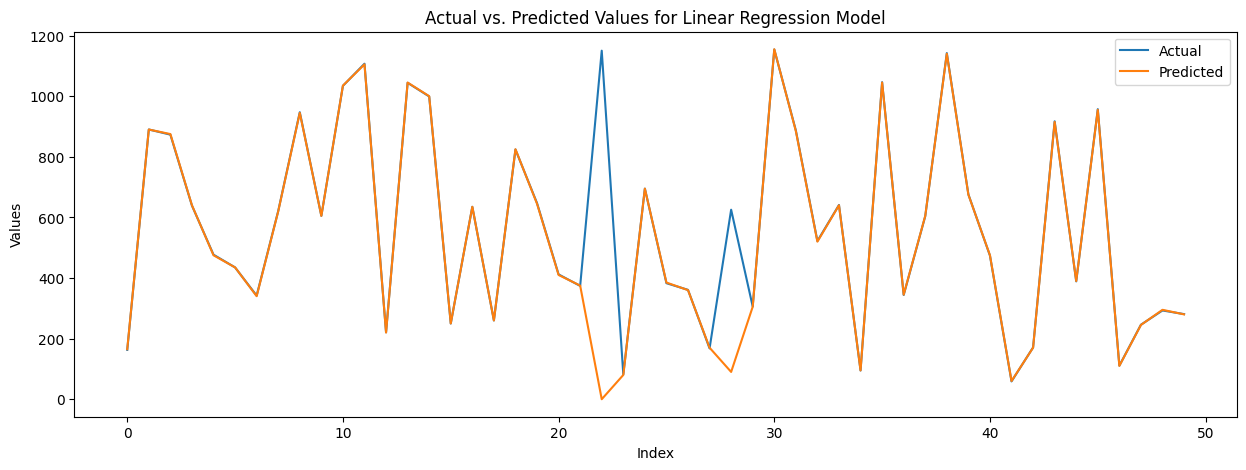

In [ ]:
y_pred_train = model_svr.predict(X_train)
y_pred_val = model_svr.predict(X_val)
y_pred_test = model_svr.predict(X_test)

# Concatenate the predictions and actual values for training, validation, and test sets
df_train = pd.DataFrame({"Set": "Train", "Actual": y_train, "Predicted": y_pred_train})
df_val = pd.DataFrame({"Set": "Validation", "Actual": y_val, "Predicted": y_pred_val})
df_test = pd.DataFrame({"Set": "Test", "Actual": y_test, "Predicted": y_pred_test})

df_combined = pd.concat([df_train, df_val, df_test])

# Reset the index before plotting
df_combined_reset = df_combined.reset_index(drop=True)

# Plot the first 50 records
plt.figure(figsize=(15, 5))
plt.plot(df_combined_reset.index[:50], df_combined_reset['Actual'][:50], label='Actual')
plt.plot(df_combined_reset.index[:50], df_combined_reset['Predicted'][:50], label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values for Linear Regression Model')
plt.show()

In [ ]:
model_names = ['Linear Regression', 'Random Forest', 'XGBoost', 'SVR']
models = [model1, model2, model3, model4]  # Replace with your actual model instances

# Initialize an empty DataFrame
results = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2'])

# Populate the DataFrame with metrics
for model_name, model in zip(model_names, models):
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = results.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)

# Display the results table
print(results)

<ipython-input-42-137bbc0069cd>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)
<ipython-input-42-137bbc0069cd>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)
<ipython-input-42-137bbc0069cd>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


               Model          MSE       MAE        R2
0  Linear Regression  1681.016373  5.758525  0.984679
1      Random Forest   536.792098  2.812767  0.995108
2            XGBoost   483.576063  3.624075  0.995593
3                SVR  1696.367106  3.326185  0.984540


<ipython-input-42-137bbc0069cd>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2}, ignore_index=True)


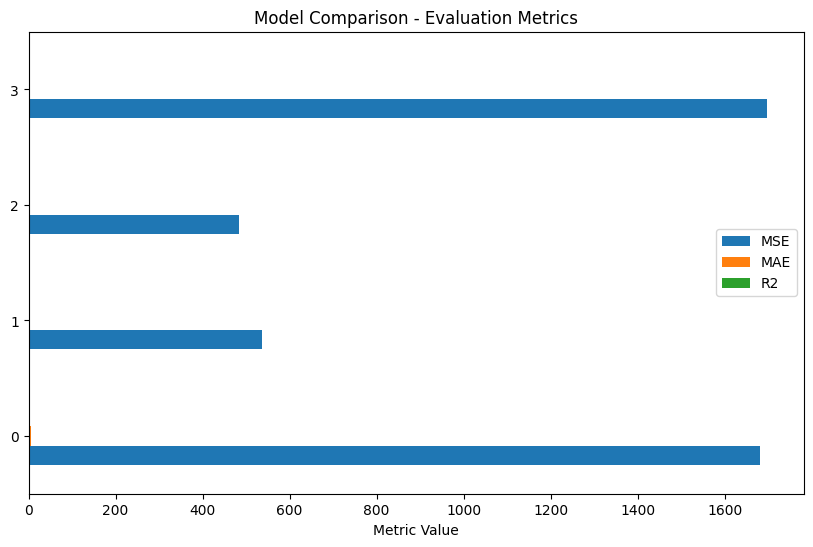

In [ ]:
results.plot(kind='barh', figsize=(10, 6))

plt.title('Model Comparison - Evaluation Metrics')
plt.xlabel('Metric Value')
plt.show()